# [Maureen] Inftrain ABX Analysis

## Monolingual data only


In [1]:
import json
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import warnings
import seaborn as sns

#better and bigger plots inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 250 # 200 e.g. is really fine, but slower

sns.set_theme()

HOME="/linkhome/rech/genini01/ucv88ce/"
models_path=os.path.join(HOME,"projects/MultilingualCPC/experiments/checkpoints/inftrain" )
eval_path=""

* Functions definition

In [70]:
def retrieve_scores( size= [50,100, 200, 400, 800, 1600], models_path='/gpfsscratch/rech/cfs/commun/InfTrain_models/'):
    fam_dict={}
    langs=["EN","FR"]
    tasks=["aga_easy", "ata_easy", "ana_easy"]
    for s in sorted(size):
        s=int(s)
        for fam in ["{}".format(str(x).zfill(2)) for x in range(int(32/s*100))] :
            for model in langs:
                k = fam+"_"+model+"_"+str(s)
                values = [fam, int(s), model]
                path = os.path.join(models_path,model,str(s)+"h",fam,"lstm/scores/syntax_small/score_syntactic_dev_by_type.csv")
                scores = pd.read_csv(path)
                for t in tasks:
                    values.append(float(scores[scores['type'] == t]["score"])*100)
                    values.append(float(scores[scores['type'] == t]["std"])*100)
                values.append(scores["score"].mean()*100)
                values.append(scores["std"].mean()*100)
                    
                fam_dict[k] = values
    
    a =  [t for t in tasks]
    b = ['{}_std'.format(t) for t in tasks]
    
    col  = ["fam_id", "size", "lang"] + [item for pair in zip(a, b) for item in pair]  + ["score" ,"std" ]

    df = pd.DataFrame.from_dict(fam_dict, orient='index', columns=col)
    return df
       
                    
                
                
        


In [71]:
df = retrieve_scores()
df_fr = df[df["lang"]=="FR"]
df_en = df[df["lang"]=="EN"]
df_size = df.groupby(by="size").mean()

In [72]:
df

fam_id  size lang  aga_easy  aga_easy_std  ata_easy  ata_easy_std  \
00_EN_50       00    50   EN     51.53         27.24     49.68         31.75   
00_FR_50       00    50   FR     50.45         27.67     50.28         28.26   
01_EN_50       01    50   EN     49.72         26.44     48.03         29.75   
01_FR_50       01    50   FR     50.51         28.05     50.00         31.47   
02_EN_50       02    50   EN     51.70         24.63     51.00         29.71   
...           ...   ...  ...       ...           ...       ...           ...   
03_FR_800      03   800   FR     51.65         28.96     49.51         31.94   
00_EN_1600     00  1600   EN     49.15         27.74     49.49         30.94   
00_FR_1600     00  1600   FR     51.48         29.24     49.22         35.55   
01_EN_1600     01  1600   EN     50.45         27.26     49.56         31.95   
01_FR_1600     01  1600   FR     50.57         30.09     50.11         31.45   

            ana_easy  ana_easy_std      score        std  
00_EN_50       50.31         28.87  50.506667  29.286667  
00_FR_50       49.48         29.61  50.070000  28.513333  
01_EN_50       51.18         27.66  49.643333  27.950000  
01_FR_50       51.28         31.66  50.596667  30.393333  
02_EN_50       50.10         28.23  50.933333  27.523333  
...              ...           ...        ...        ...  
03_FR_800      48.30         29.45  49.820000  30.116667  
00_EN_1600     50.97         33.52  49.870000  30.733333  
00_FR_1600     51.25         30.13  50.650000  31.640000  
01_EN_1600     50.45         36.74  50.153333  31.983333  
01_FR_1600     49.55         28.38  50.076667  29.973333  

[252 rows x 11 columns]

In [73]:
df_size = df.groupby(by=["size", "lang"]).mean()

In [74]:
df_size

aga_easy  aga_easy_std   ata_easy  ata_easy_std   ana_easy  \
size lang                                                                
50   EN    50.028438     28.019063  49.752031     30.279531  50.239375   
     FR    50.211562     28.760938  49.943438     30.125156  50.340312   
100  EN    49.972813     28.336562  49.519375     30.491563  50.641875   
     FR    50.131563     30.112188  49.770625     30.895312  50.190312   
200  EN    50.440000     27.796875  49.314375     30.679375  50.337500   
     FR    50.124375     29.378750  49.746875     31.671875  50.171875   
400  EN    50.773750     28.417500  49.428750     31.315000  50.586250   
     FR    50.512500     30.016250  49.511250     32.530000  50.091250   
800  EN    50.197500     29.292500  49.920000     31.717500  50.372500   
     FR    50.782500     29.797500  50.062500     32.435000  50.287500   
1600 EN    49.800000     27.500000  49.525000     31.445000  50.710000   
     FR    51.025000     29.665000  49.665000     33.500000  50.400000   

           ana_easy_std      score        std  
size lang                                      
50   EN       30.427969  50.006615  29.575521  
     FR       29.175156  50.165104  29.353750  
100  EN       30.556250  50.044688  29.794792  
     FR       29.693125  50.030833  30.233542  
200  EN       32.539375  50.030625  30.338542  
     FR       30.285000  50.014375  30.445208  
400  EN       33.582500  50.262917  31.105000  
     FR       31.278750  50.038333  31.275000  
800  EN       33.995000  50.163333  31.668333  
     FR       30.522500  50.377500  30.918333  
1600 EN       35.130000  50.011667  31.358333  
     FR       29.255000  50.363333  30.806667

In [76]:
df_size.unstack()

aga_easy            aga_easy_std              ata_easy             \
lang         EN         FR           EN         FR         EN         FR   
size                                                                       
50    50.028438  50.211562    28.019063  28.760938  49.752031  49.943438   
100   49.972813  50.131563    28.336562  30.112188  49.519375  49.770625   
200   50.440000  50.124375    27.796875  29.378750  49.314375  49.746875   
400   50.773750  50.512500    28.417500  30.016250  49.428750  49.511250   
800   50.197500  50.782500    29.292500  29.797500  49.920000  50.062500   
1600  49.800000  51.025000    27.500000  29.665000  49.525000  49.665000   

     ata_easy_std              ana_easy            ana_easy_std             \
lang           EN         FR         EN         FR           EN         FR   
size                                                                         
50      30.279531  30.125156  50.239375  50.340312    30.427969  29.175156   
100     30.491563  30.895312  50.641875  50.190312    30.556250  29.693125   
200     30.679375  31.671875  50.337500  50.171875    32.539375  30.285000   
400     31.315000  32.530000  50.586250  50.091250    33.582500  31.278750   
800     31.717500  32.435000  50.372500  50.287500    33.995000  30.522500   
1600    31.445000  33.500000  50.710000  50.400000    35.130000  29.255000   

          score                   std             
lang         EN         FR         EN         FR  
size                                              
50    50.006615  50.165104  29.575521  29.353750  
100   50.044688  50.030833  29.794792  30.233542  
200   50.030625  50.014375  30.338542  30.445208  
400   50.262917  50.038333  31.105000  31.275000  
800   50.163333  50.377500  31.668333  30.918333  
1600  50.011667  50.363333  31.358333  30.806667

(48.0, 52.0)

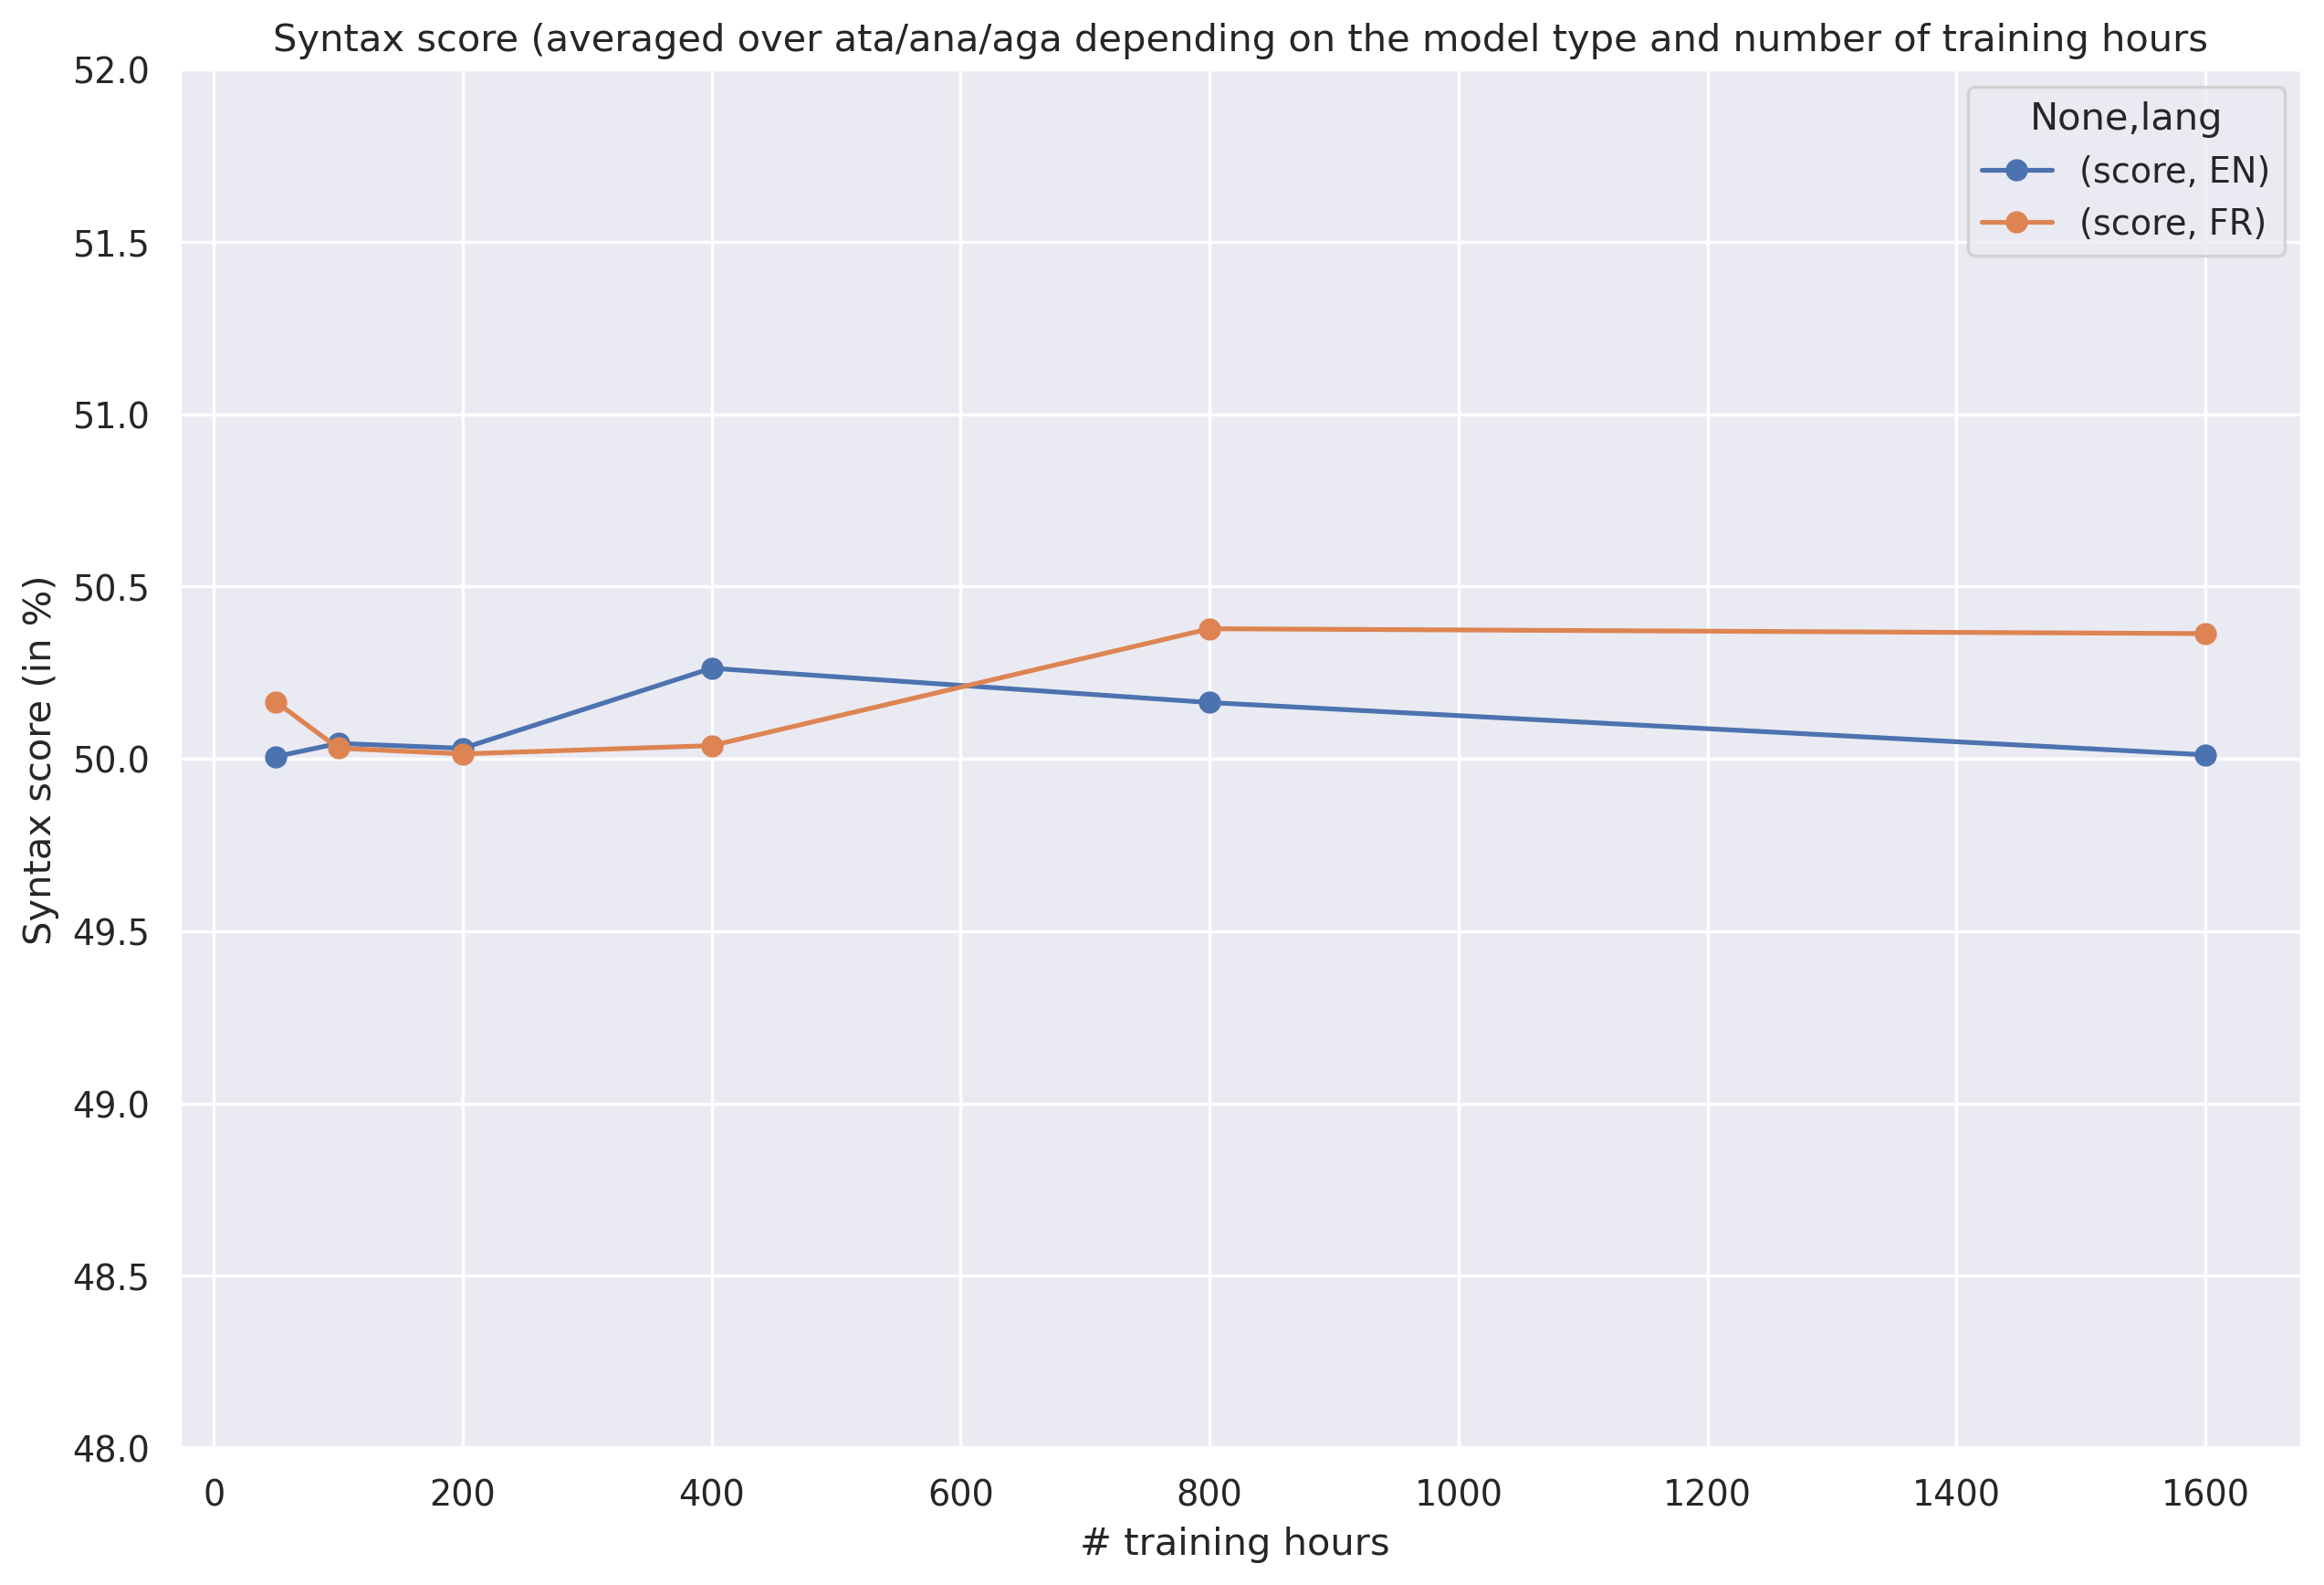

In [119]:
df_size[['score']].unstack().plot(marker='o')
plt.xlabel('# training hours ')
plt.ylabel("Syntax score (in %)")
plt.title("Syntax score (averaged over ata/ana/aga depending on the model type and number of training hours")
#plt.ylim([45,55])
plt.ylim([48,52])


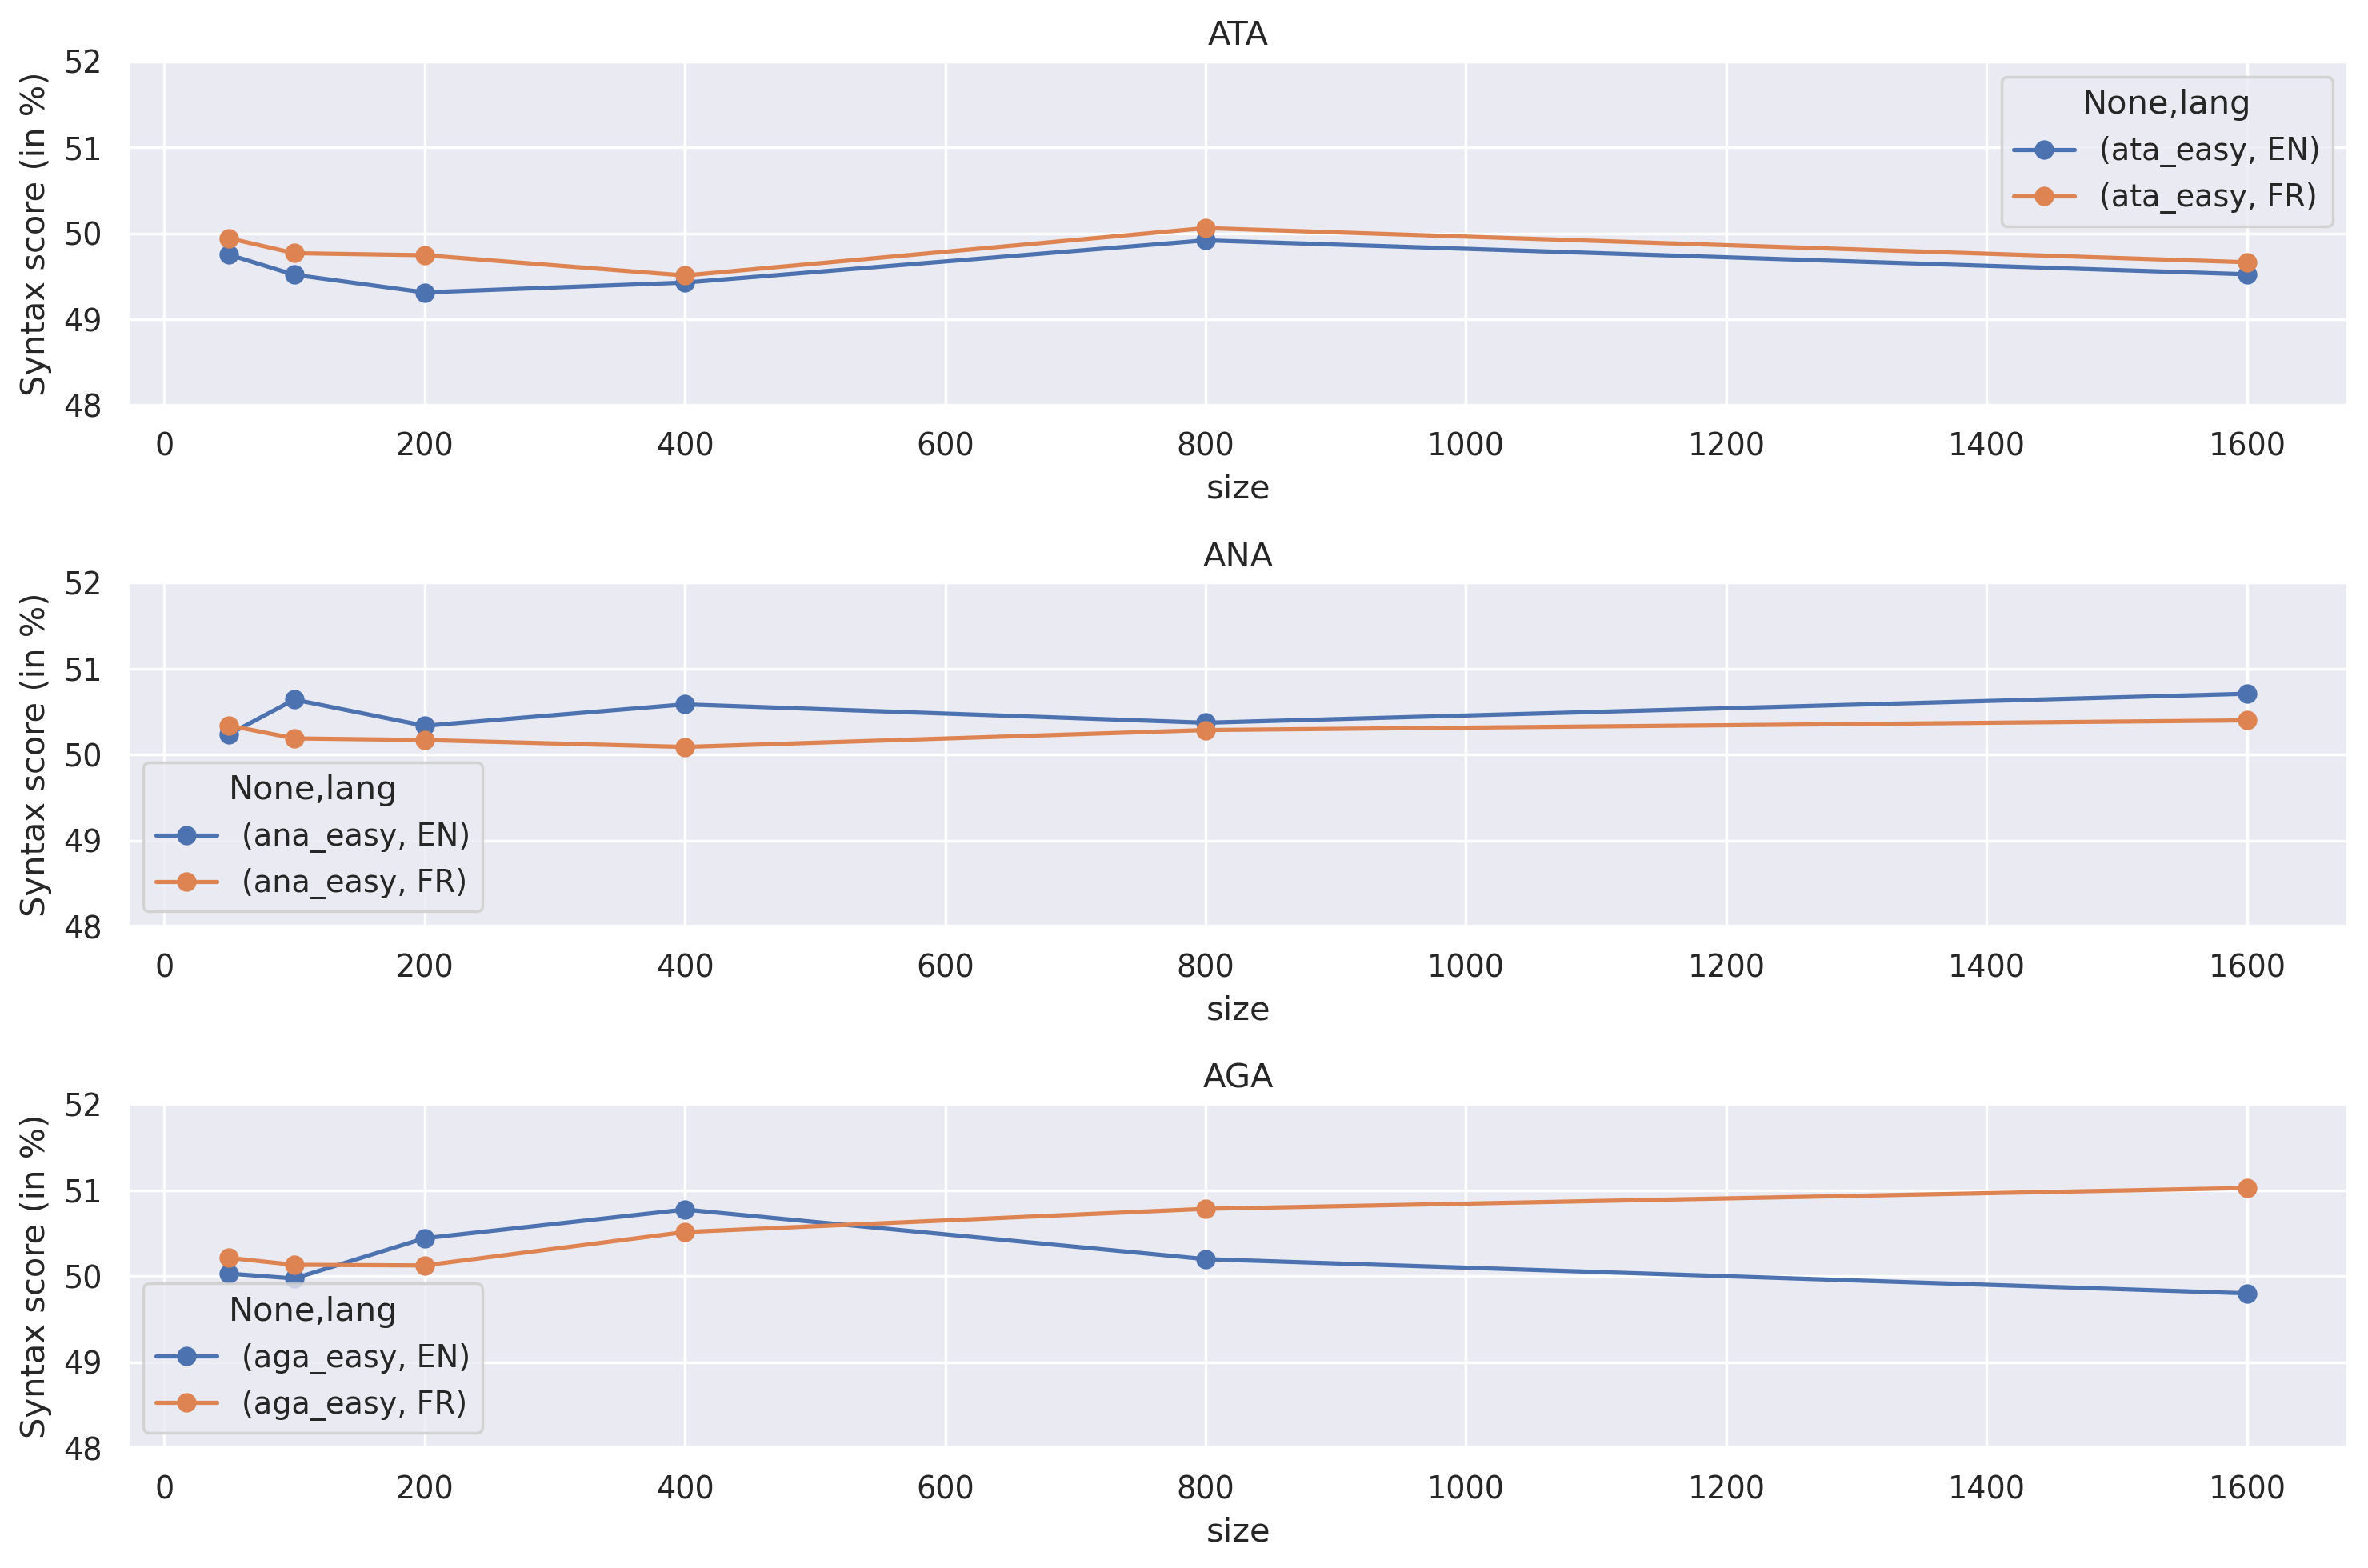

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
df_size[['ata_easy']].unstack().plot(marker='o', ax = ax1)
df_size[['ana_easy']].unstack().plot(marker='o', ax = ax2)
df_size[['aga_easy']].unstack().plot(marker='o', ax = ax3)
ax1.set_ylim([48, 52])
ax1.set_title("ATA")
ax1.set_ylabel("Syntax score (in %)")



ax2.set_ylim([48, 52])
ax2.set_title("ANA")
ax2.set_ylabel("Syntax score (in %)")


ax3.set_ylim([48, 52])
ax3.set_title("AGA")
ax3.set_ylabel("Syntax score (in %)")

fig.tight_layout()


## B. Comparing ABX scores per model type depending on test set (original vs QuickFix)

This is done on the **French** evaluation set

### B1. Scores overall (abx within)


## D. Developmental graphs

In [7]:
style_dict =  {'same': 'go-', 'different': 'ro-', 'bil_totalsize': 'bo:', 'bil_langsize':'co:', 'en_model' : 'go--', 'fr_model' : 'ro--', 'mono_avg':'wo-.'}


### D1. Developmental [within] ABX  on both test sets (original)

Text(0.5, 1.0, 'ABX [within] error rate depending on the model type and number of training hours')

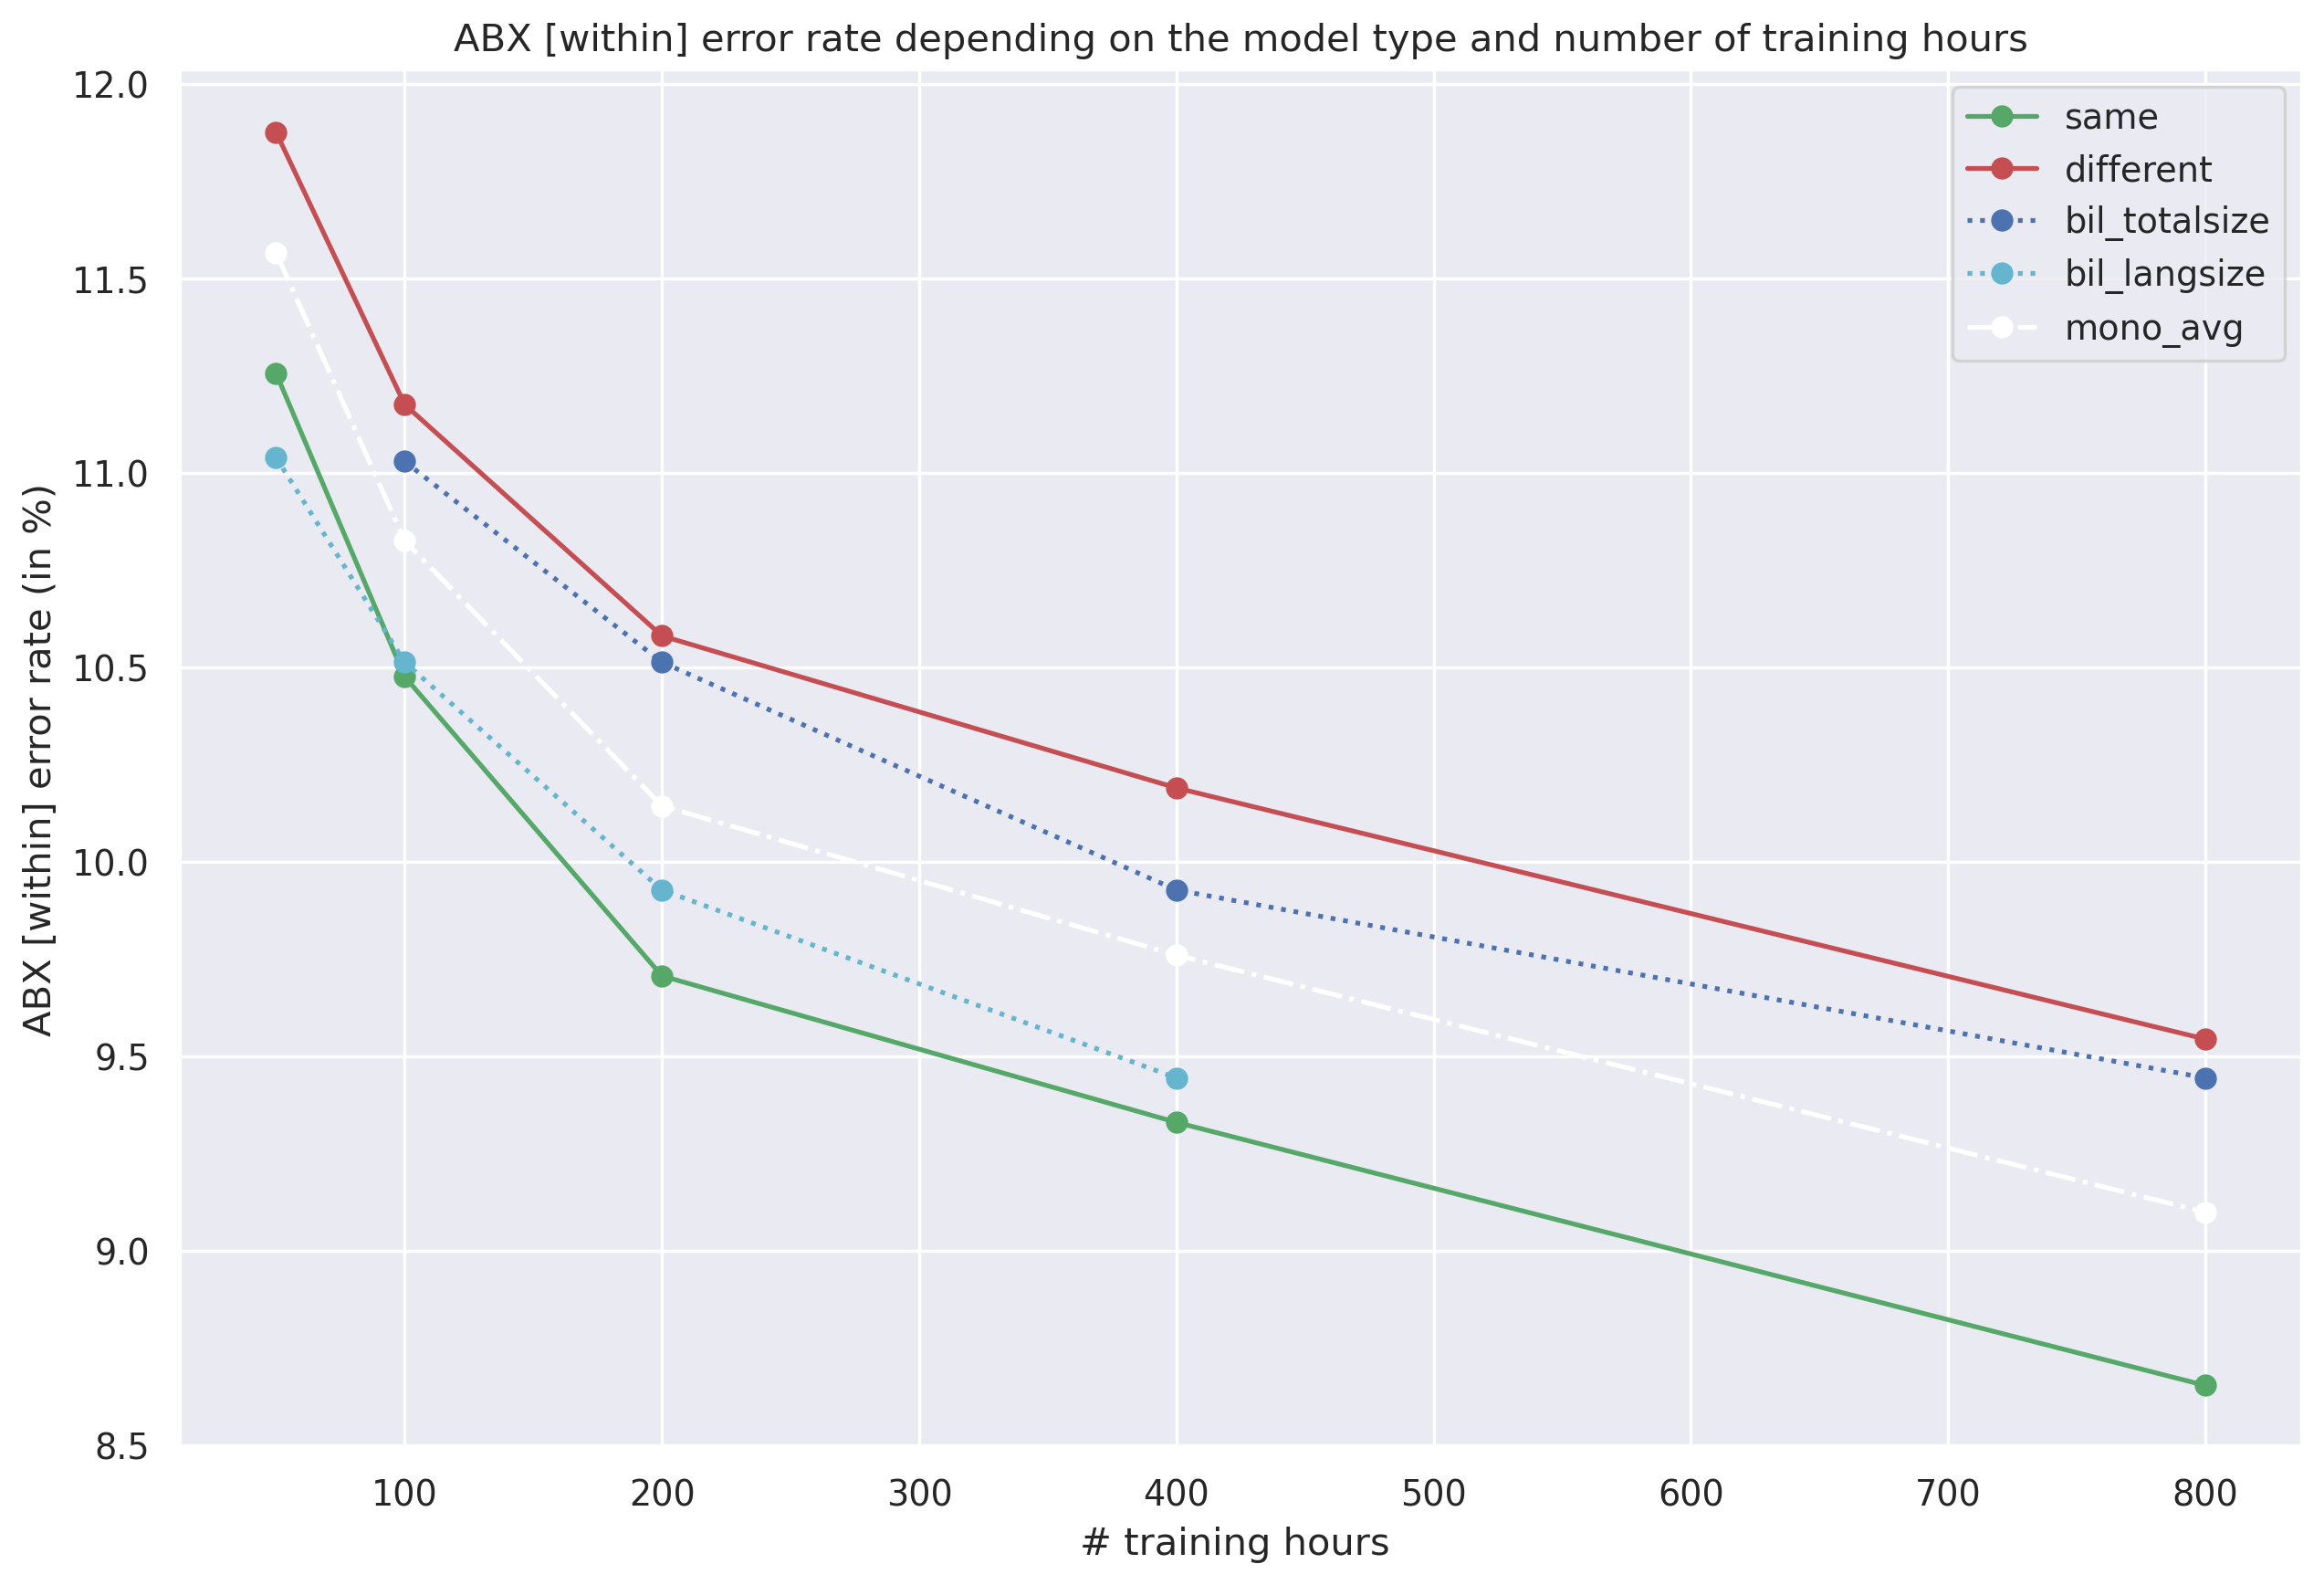

In [16]:
df_within_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.xlabel('# training hours ')
plt.ylabel("ABX [within] error rate (in %)")
plt.title("ABX [within] error rate depending on the model type and number of training hours")

### D2. Developmental [within] ABX  on both test sets (QuickFix)

Text(0.5, 1.0, 'ABX error rate depending on the model type and number of training hours')

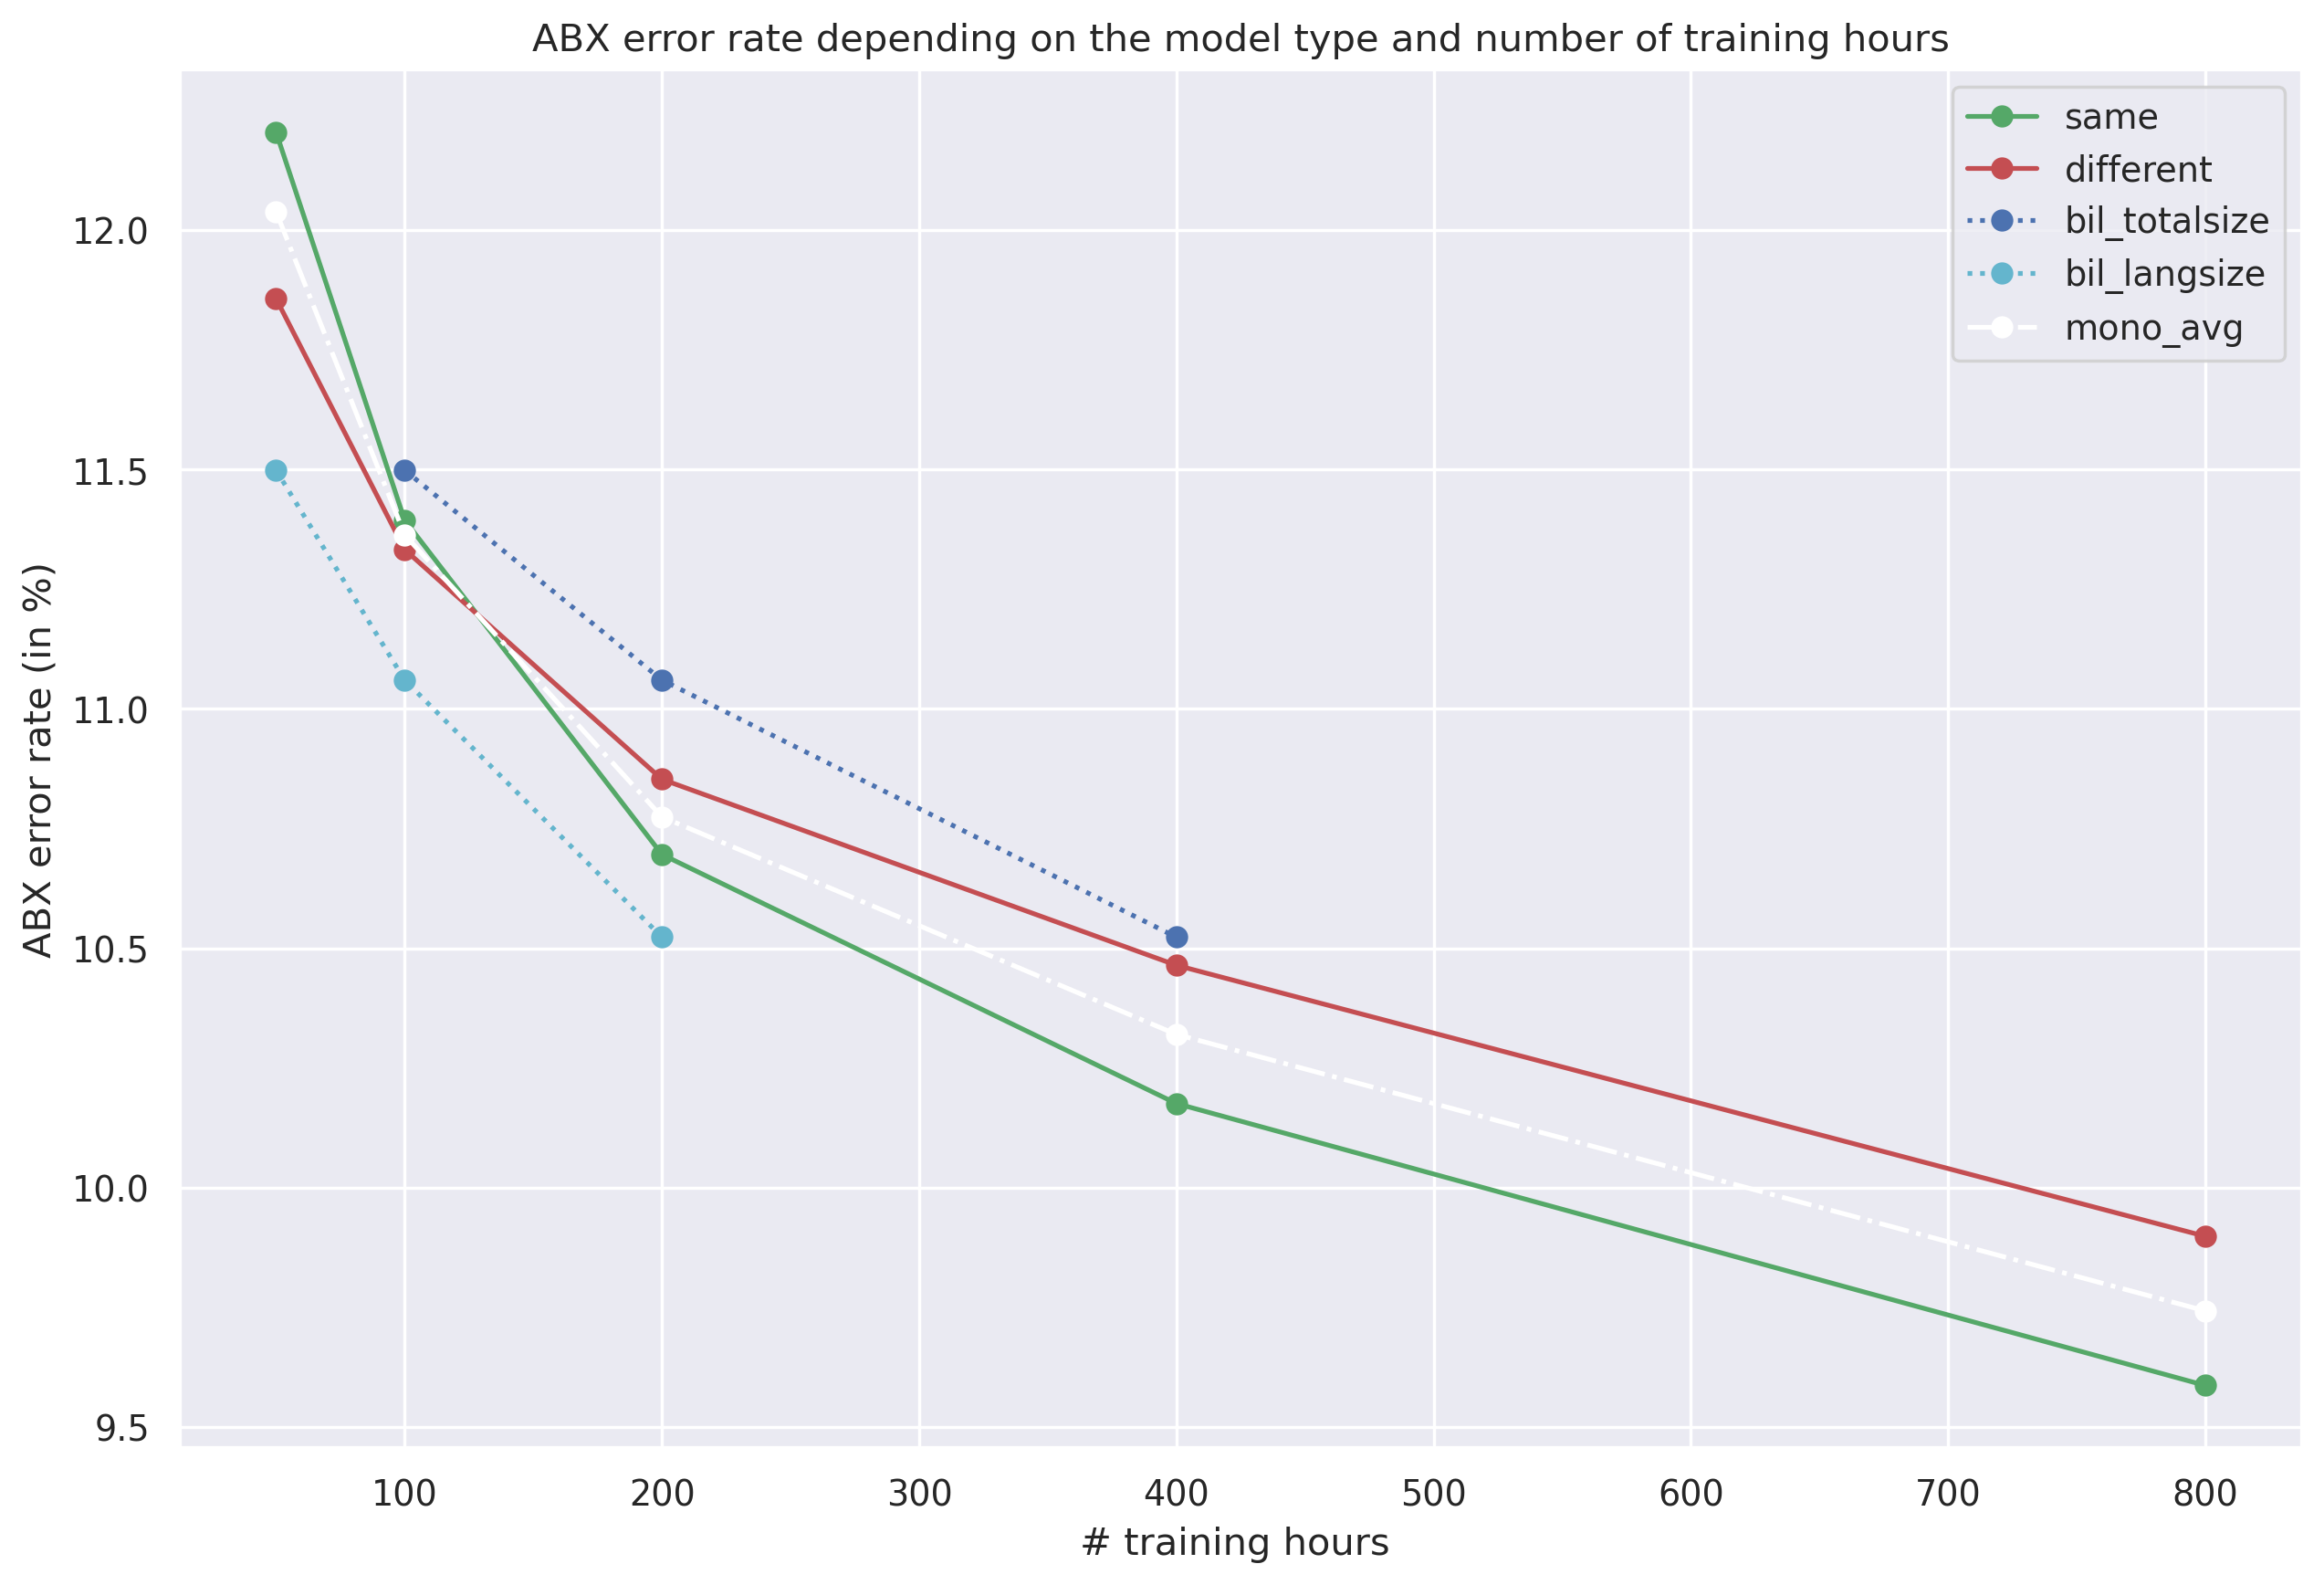

In [17]:
df_ef_within_size[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.xlabel('# training hours ')
plt.ylabel("ABX error rate (in %)")
plt.title("ABX error rate depending on the model type and number of training hours")

### D3a. Developmental [within] ABX  on the French test set (original and QuickFix)

Text(0.5, 1.0, 'ABX  [within] error rate on the FRENCH evaluation set (filtered)')

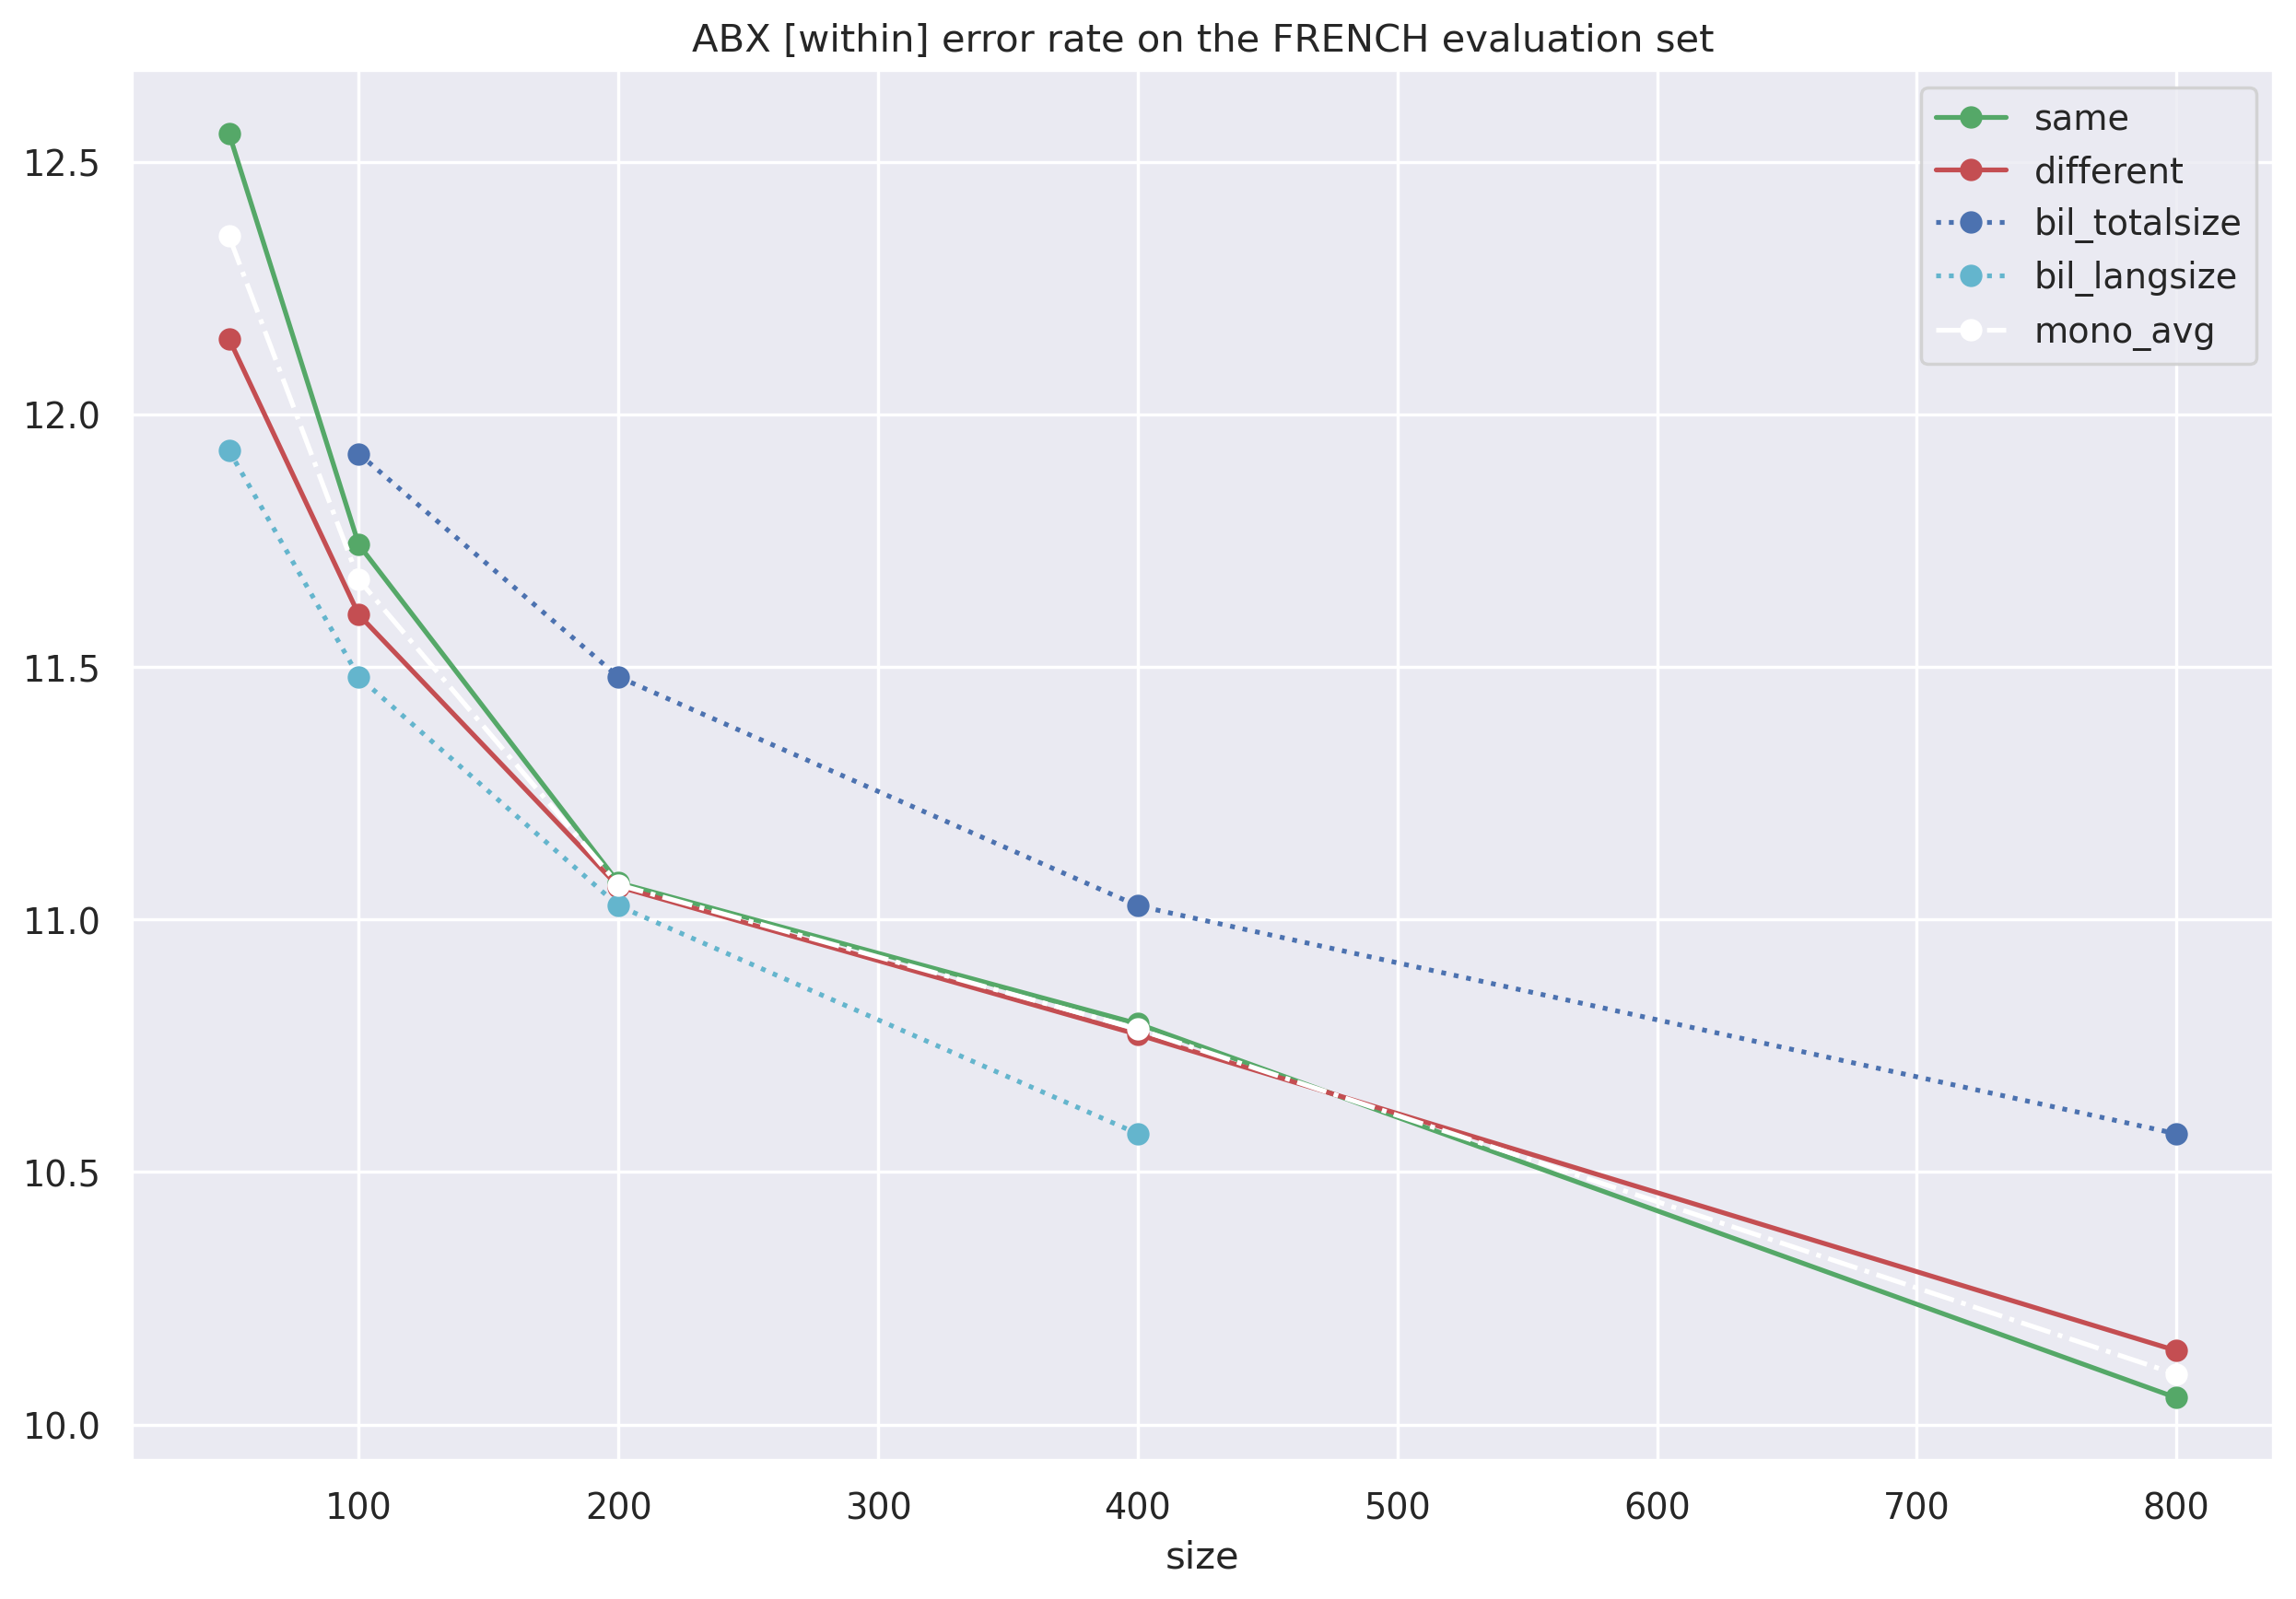

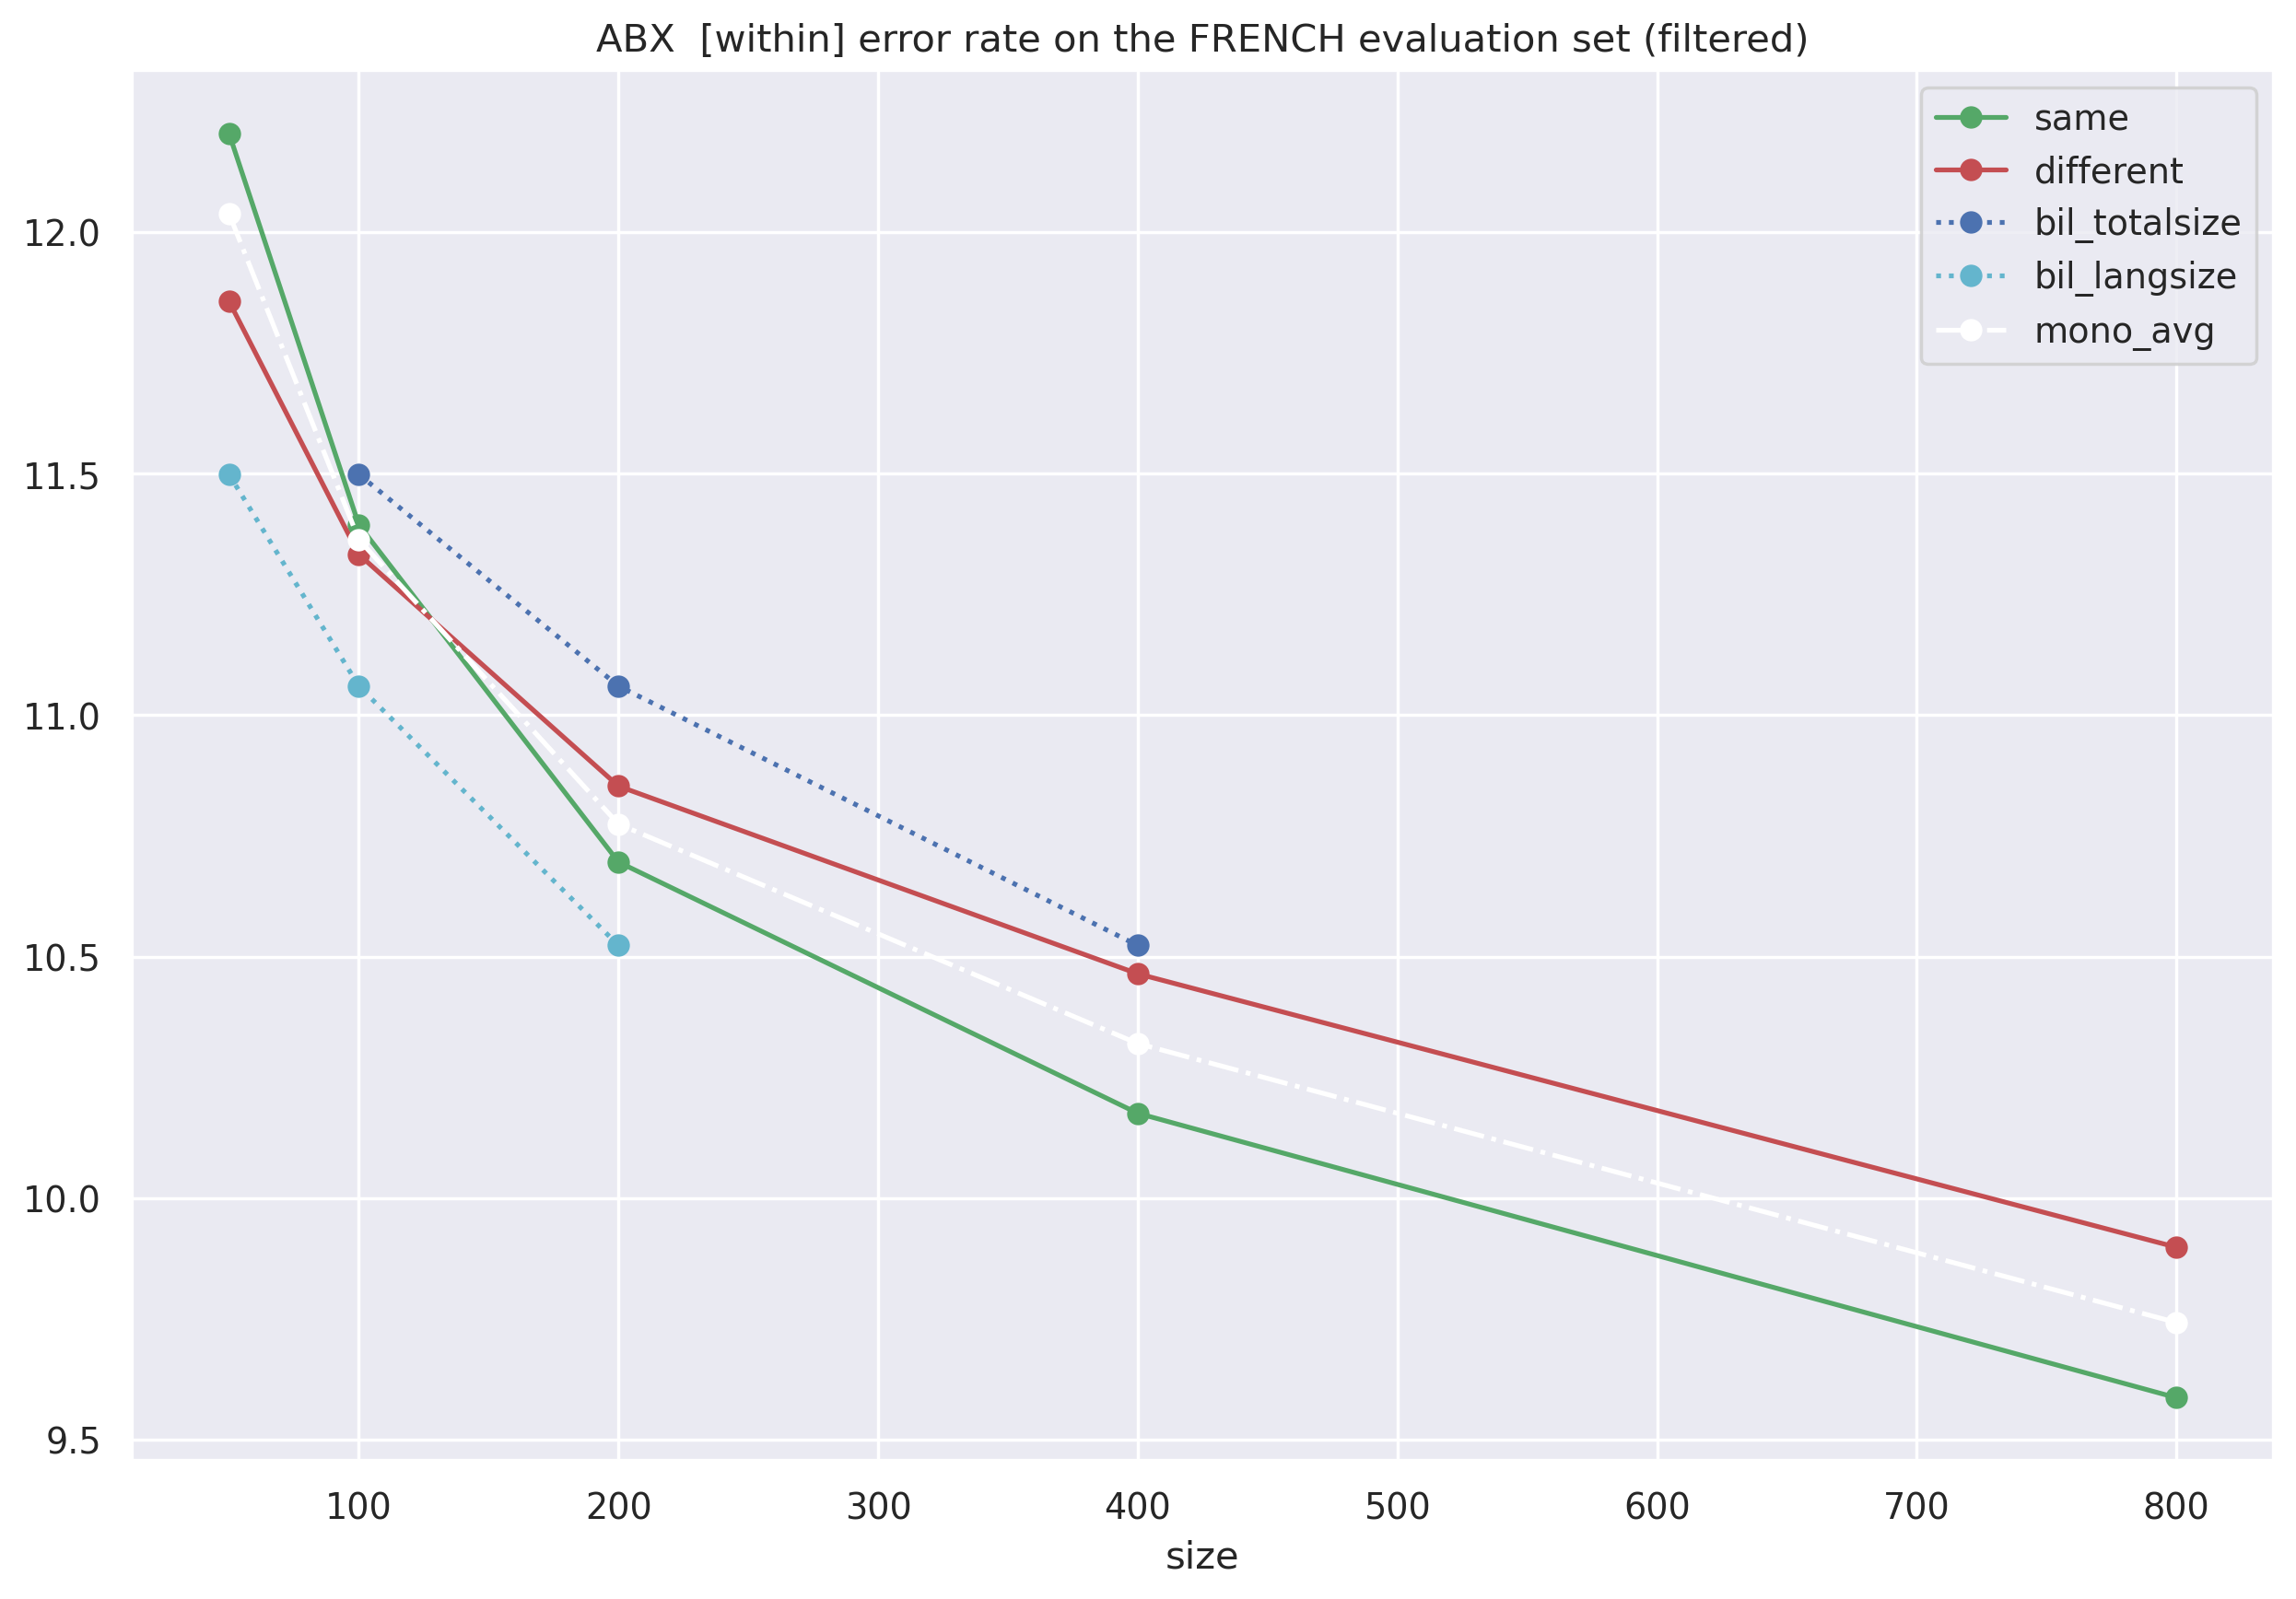

In [18]:
l="french"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.title("ABX [within] error rate on the FRENCH evaluation set")

df_tmp = df_ef_within[df_ef_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.title("ABX  [within] error rate on the FRENCH evaluation set (filtered)")


### D3b. Developmental [within] ABX  on the French test set (original and QuickFix) - xLog scale

Text(0, 0.5, 'ABX [within] error rate')

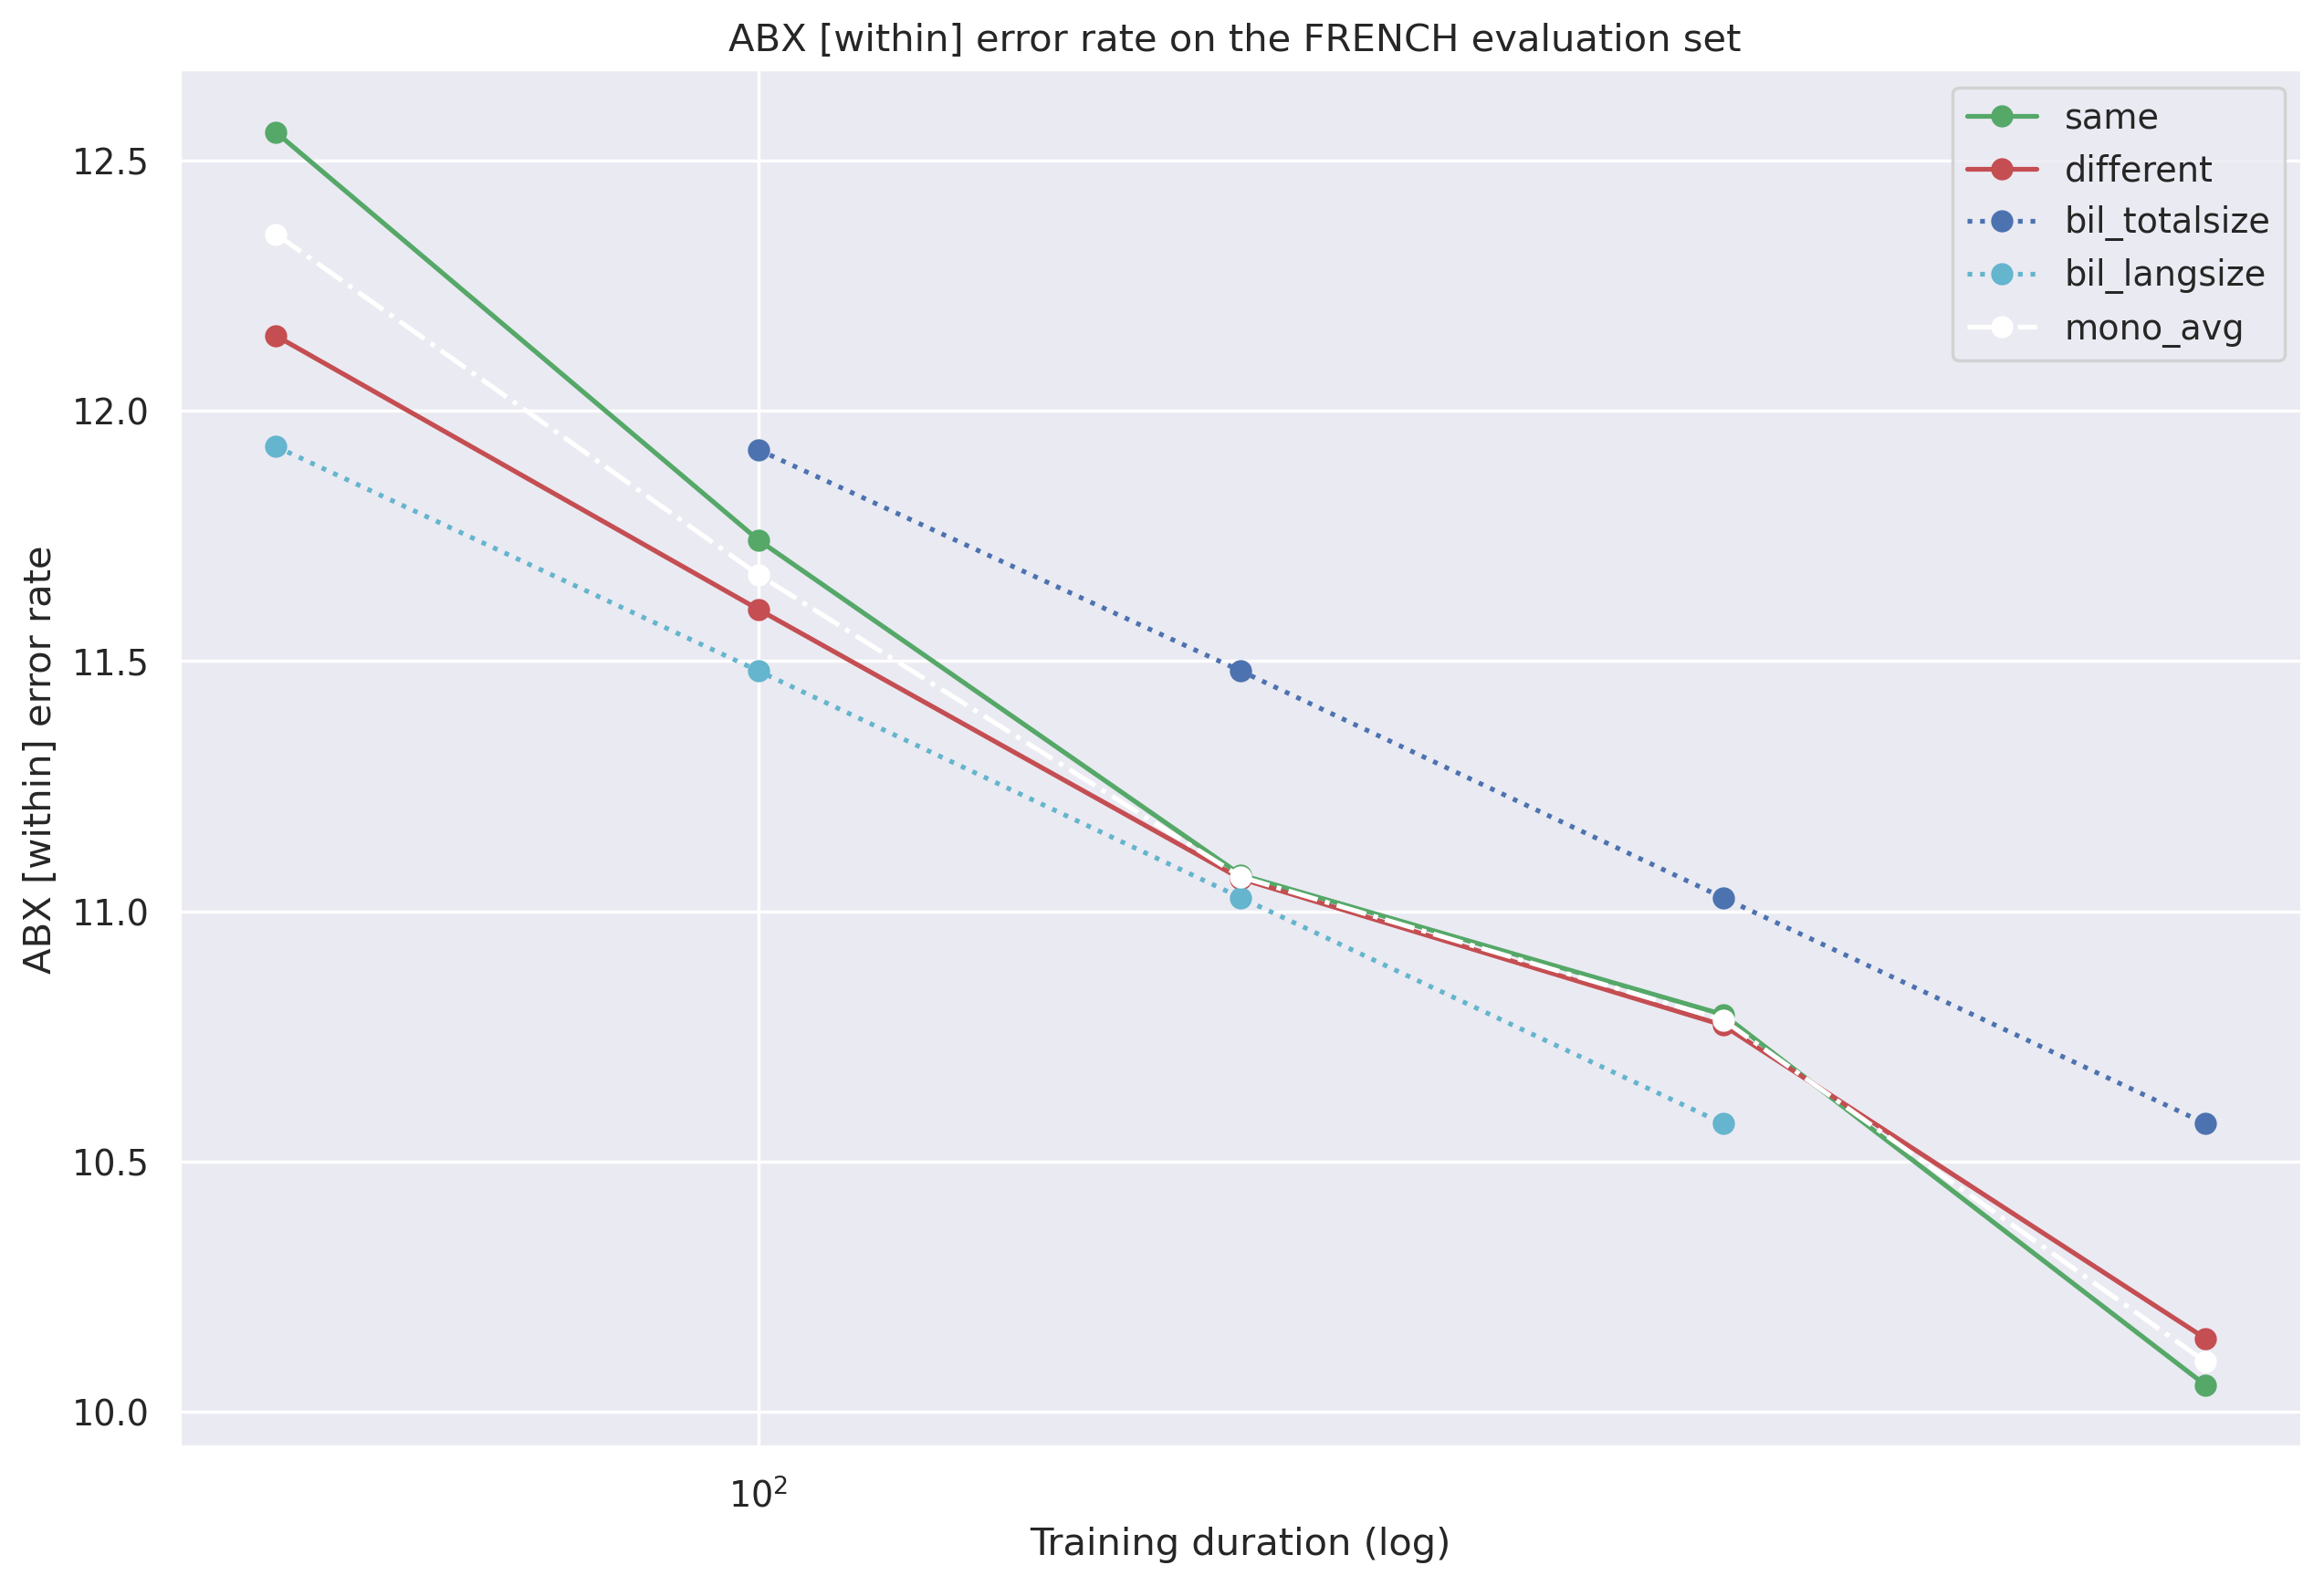

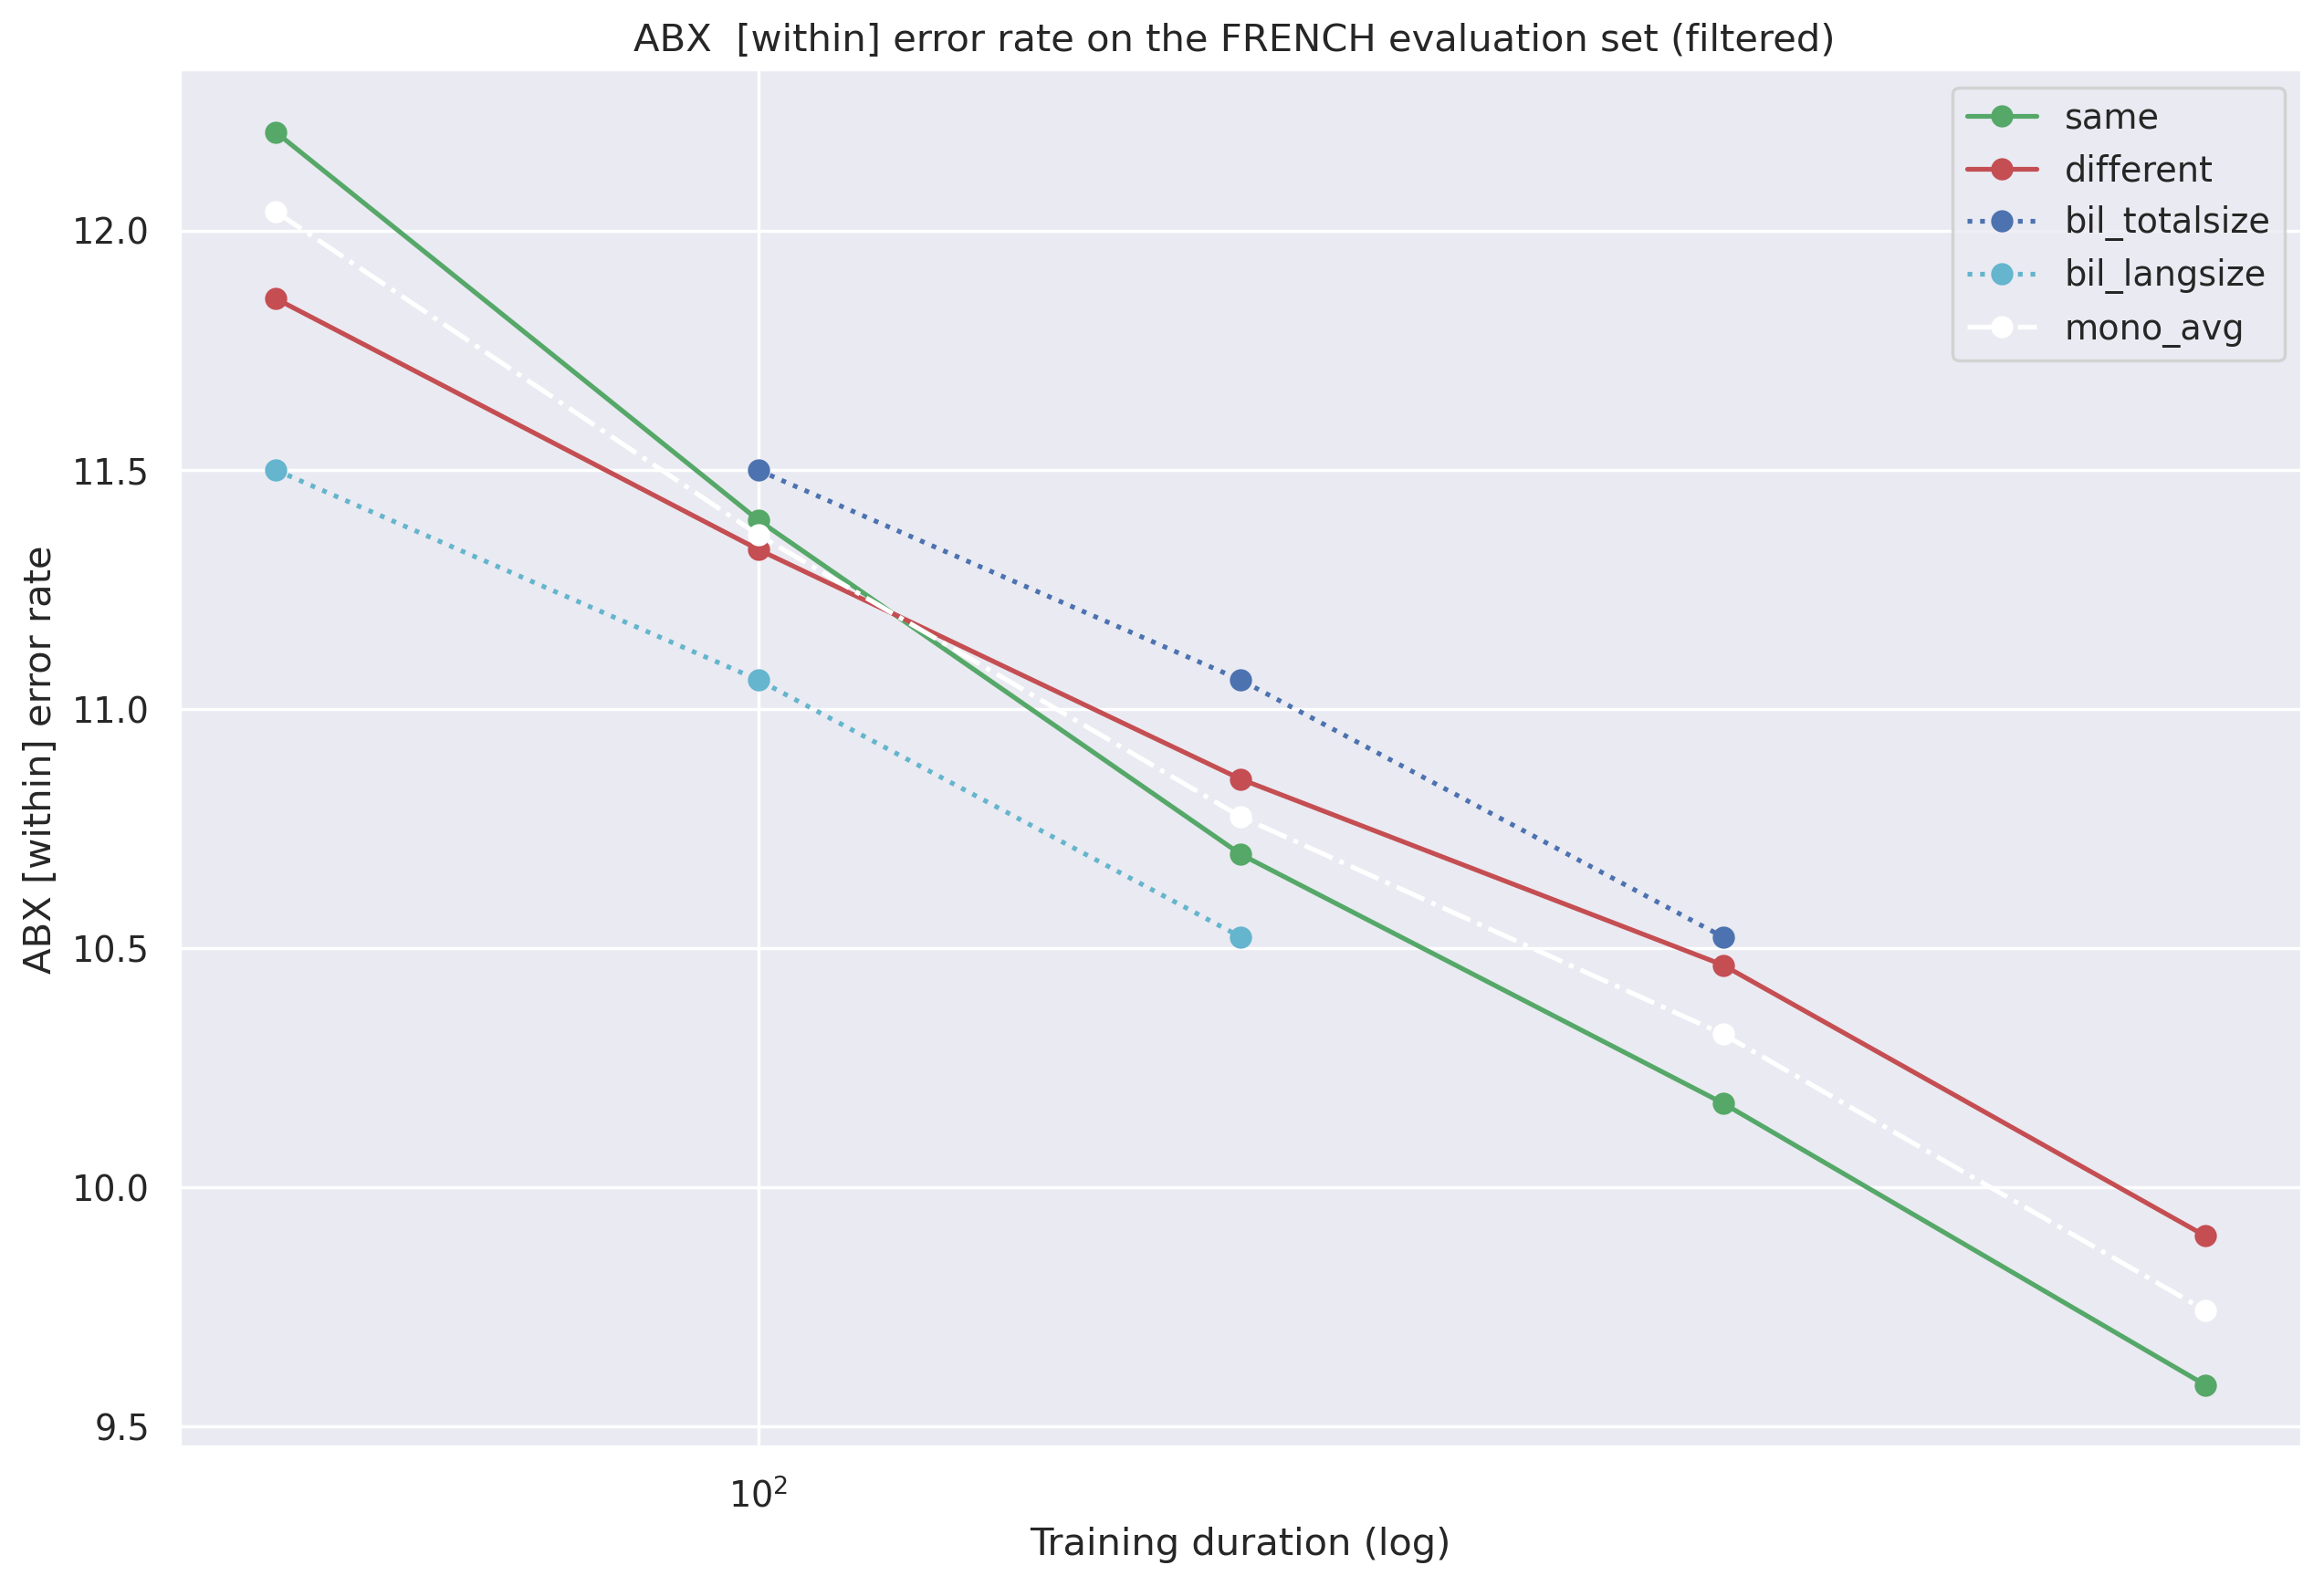

In [19]:
#log

l="french"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, logx=True)
plt.title("ABX [within] error rate on the FRENCH evaluation set ")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate")


df_tmp = df_ef_within[df_ef_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, logx=True)
plt.title("ABX  [within] error rate on the FRENCH evaluation set (filtered) ")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate")


### D3c. Developmental [within] ABX  on the French test set (original and QuickFix) - Loglog scale

(6, 13)

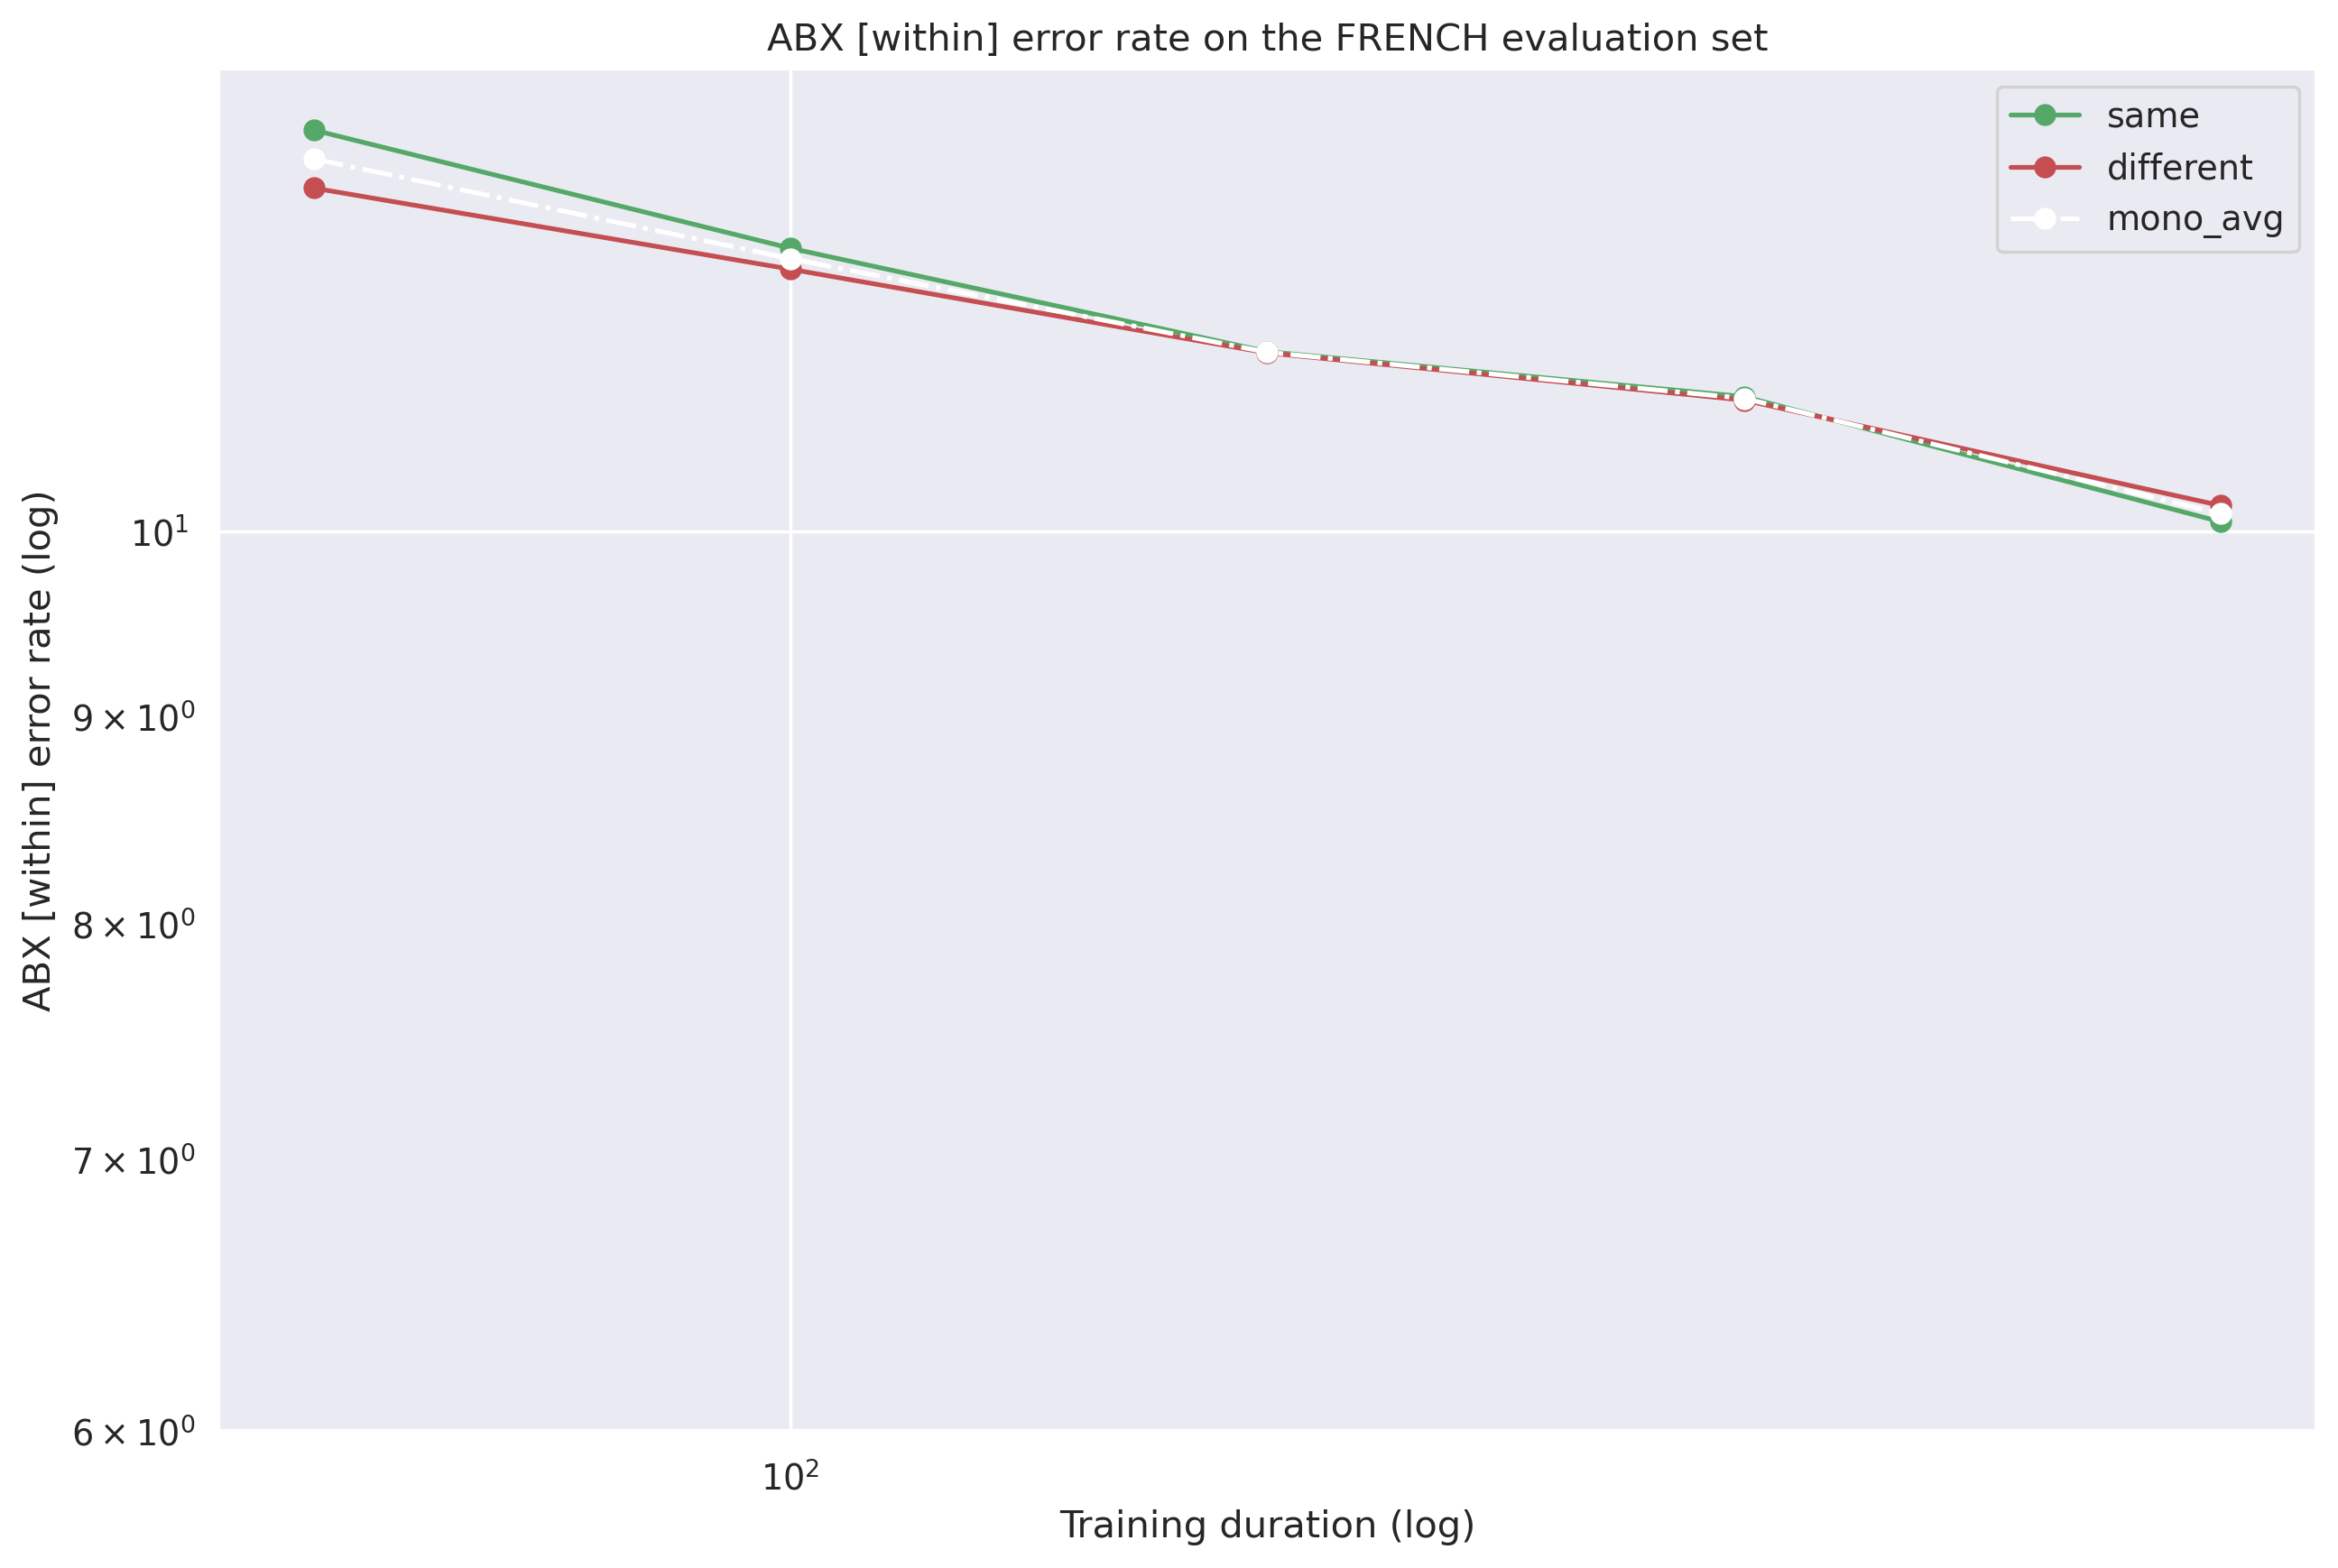

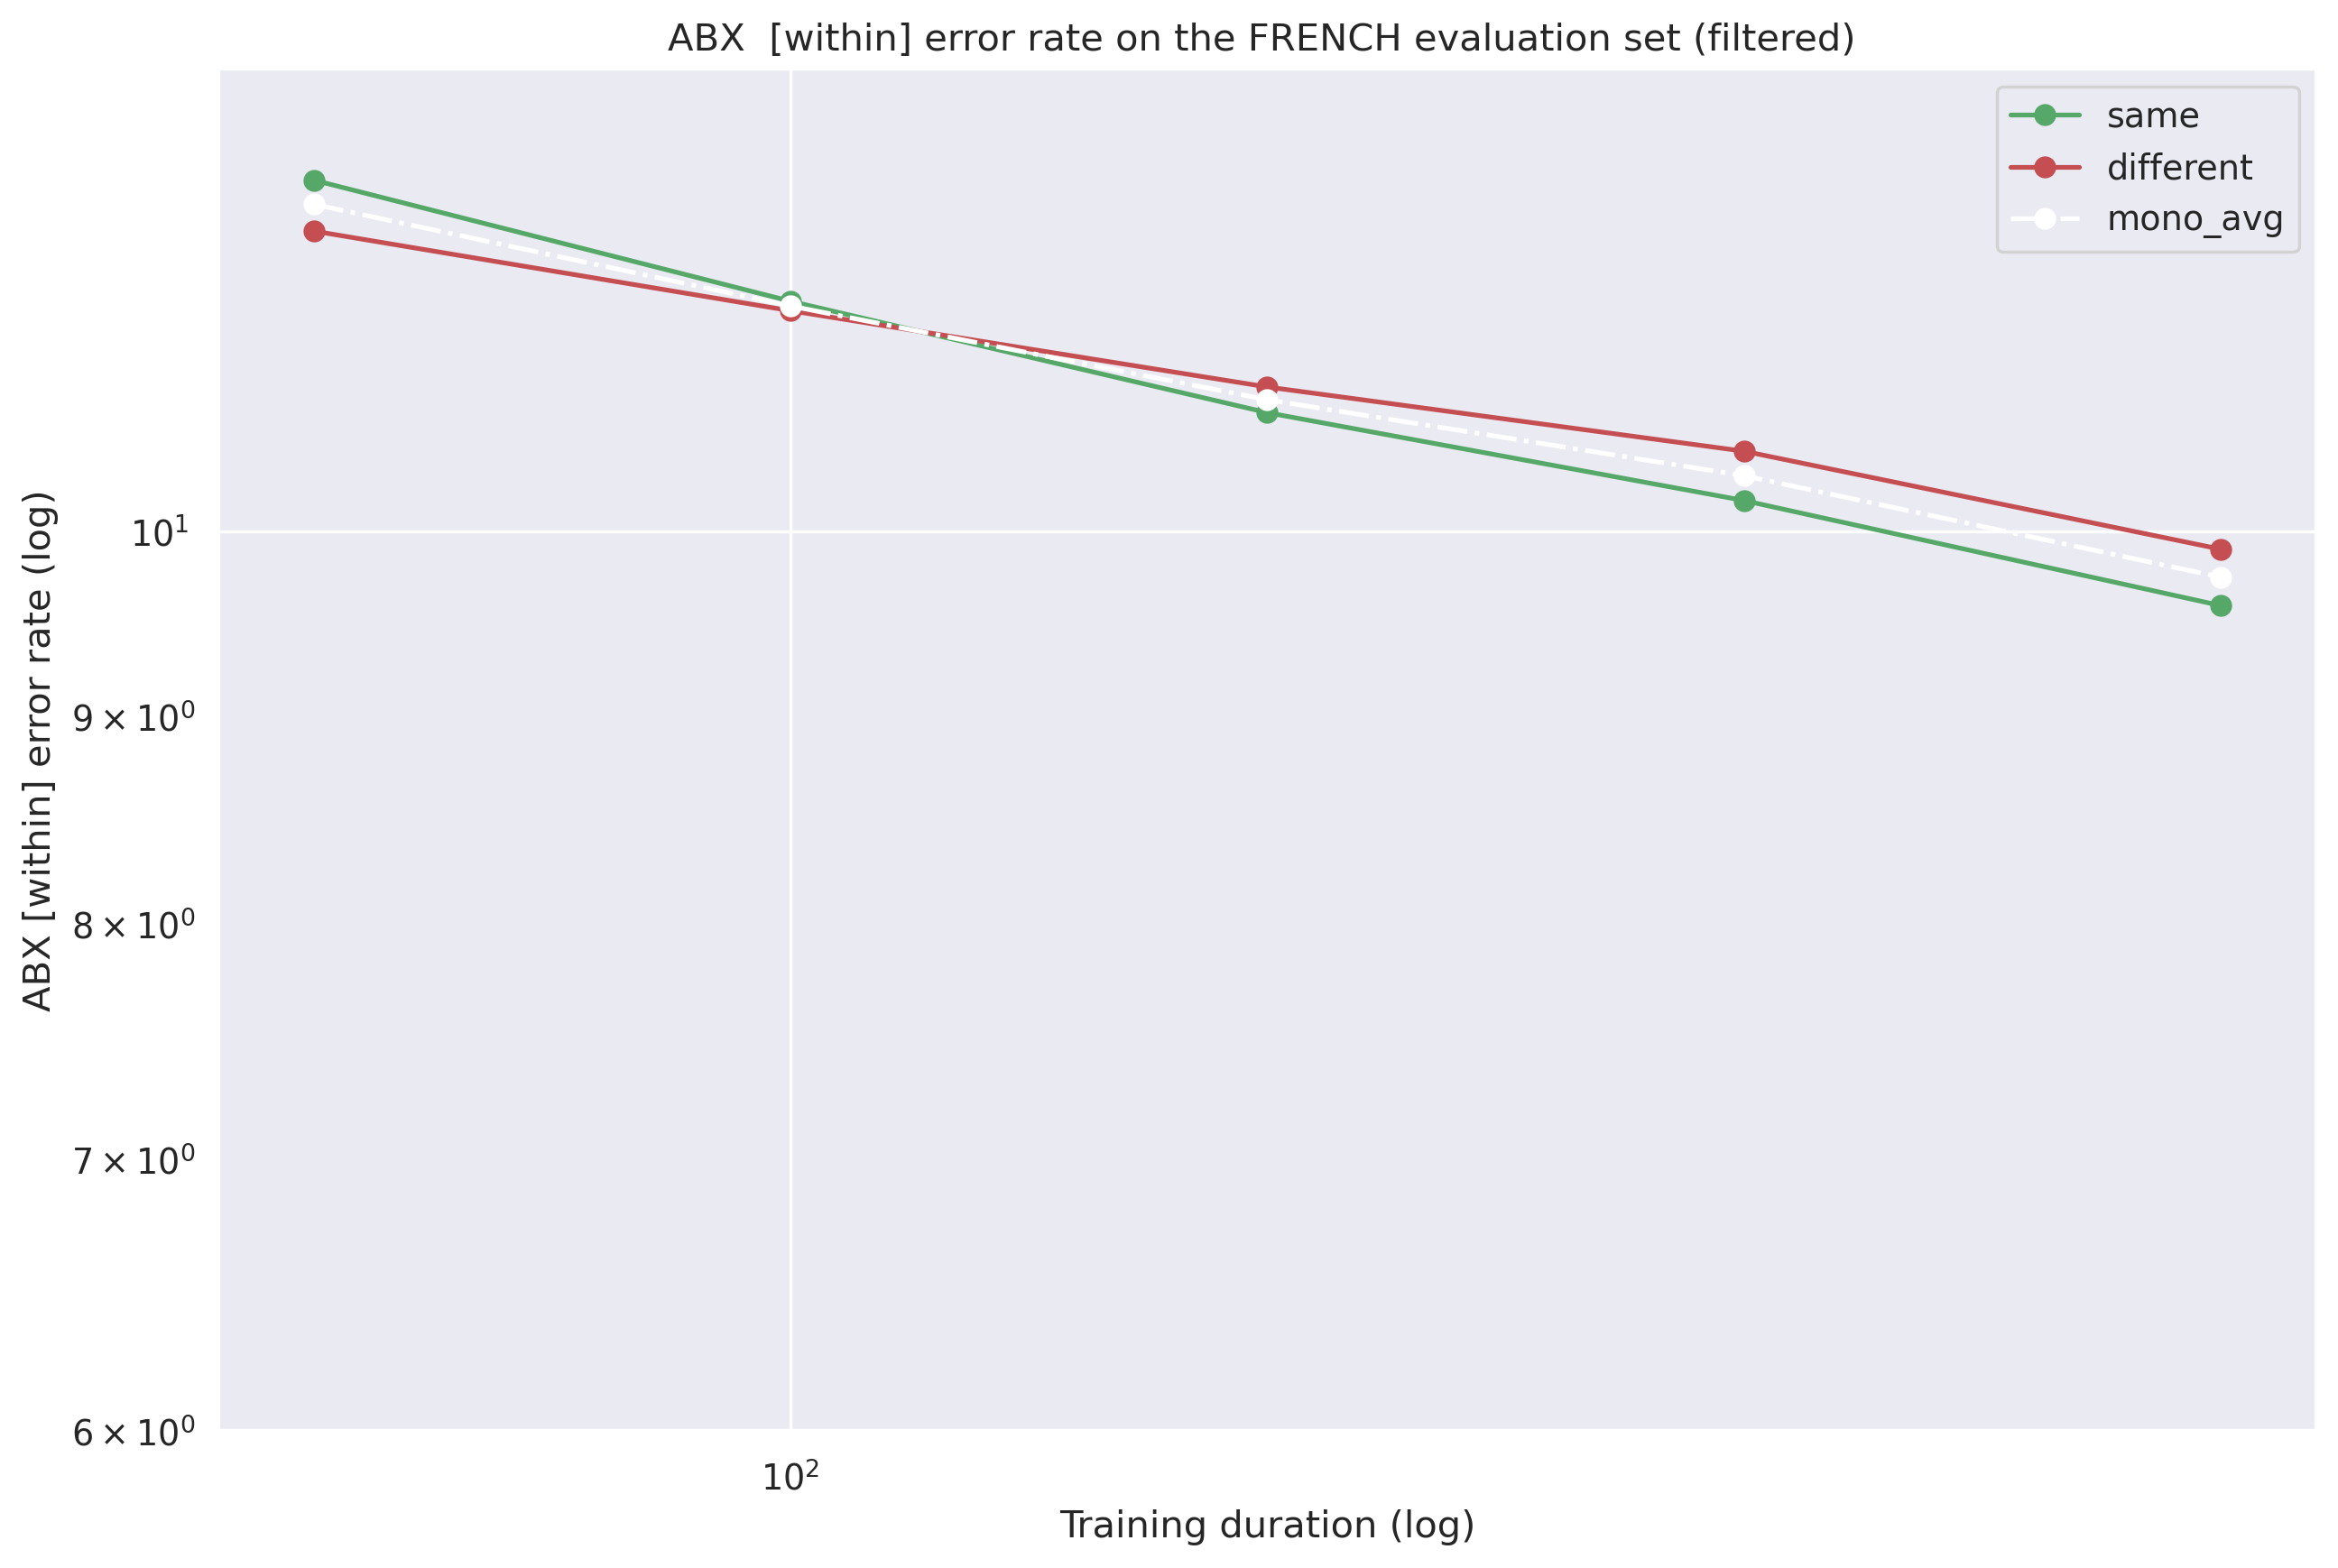

In [20]:
#log

l="french"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
#df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
df_tmp = df_tmp[['same', 'different', 'mono_avg']].plot(style = style_dict, loglog=True)

plt.title("ABX [within] error rate on the FRENCH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")
plt.ylim([6,13])


df_tmp = df_ef_within[df_ef_within["eval_lang"]==l].groupby(by="size").mean()
#df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
df_tmp = df_tmp[['same', 'different', 'mono_avg']].plot(style = style_dict, loglog=True)

plt.title("ABX  [within] error rate on the FRENCH evaluation set (filtered) ")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")
plt.ylim([6,13])


### D4a. Developmental [within] ABX on the English test set

(6.0, 13.0)

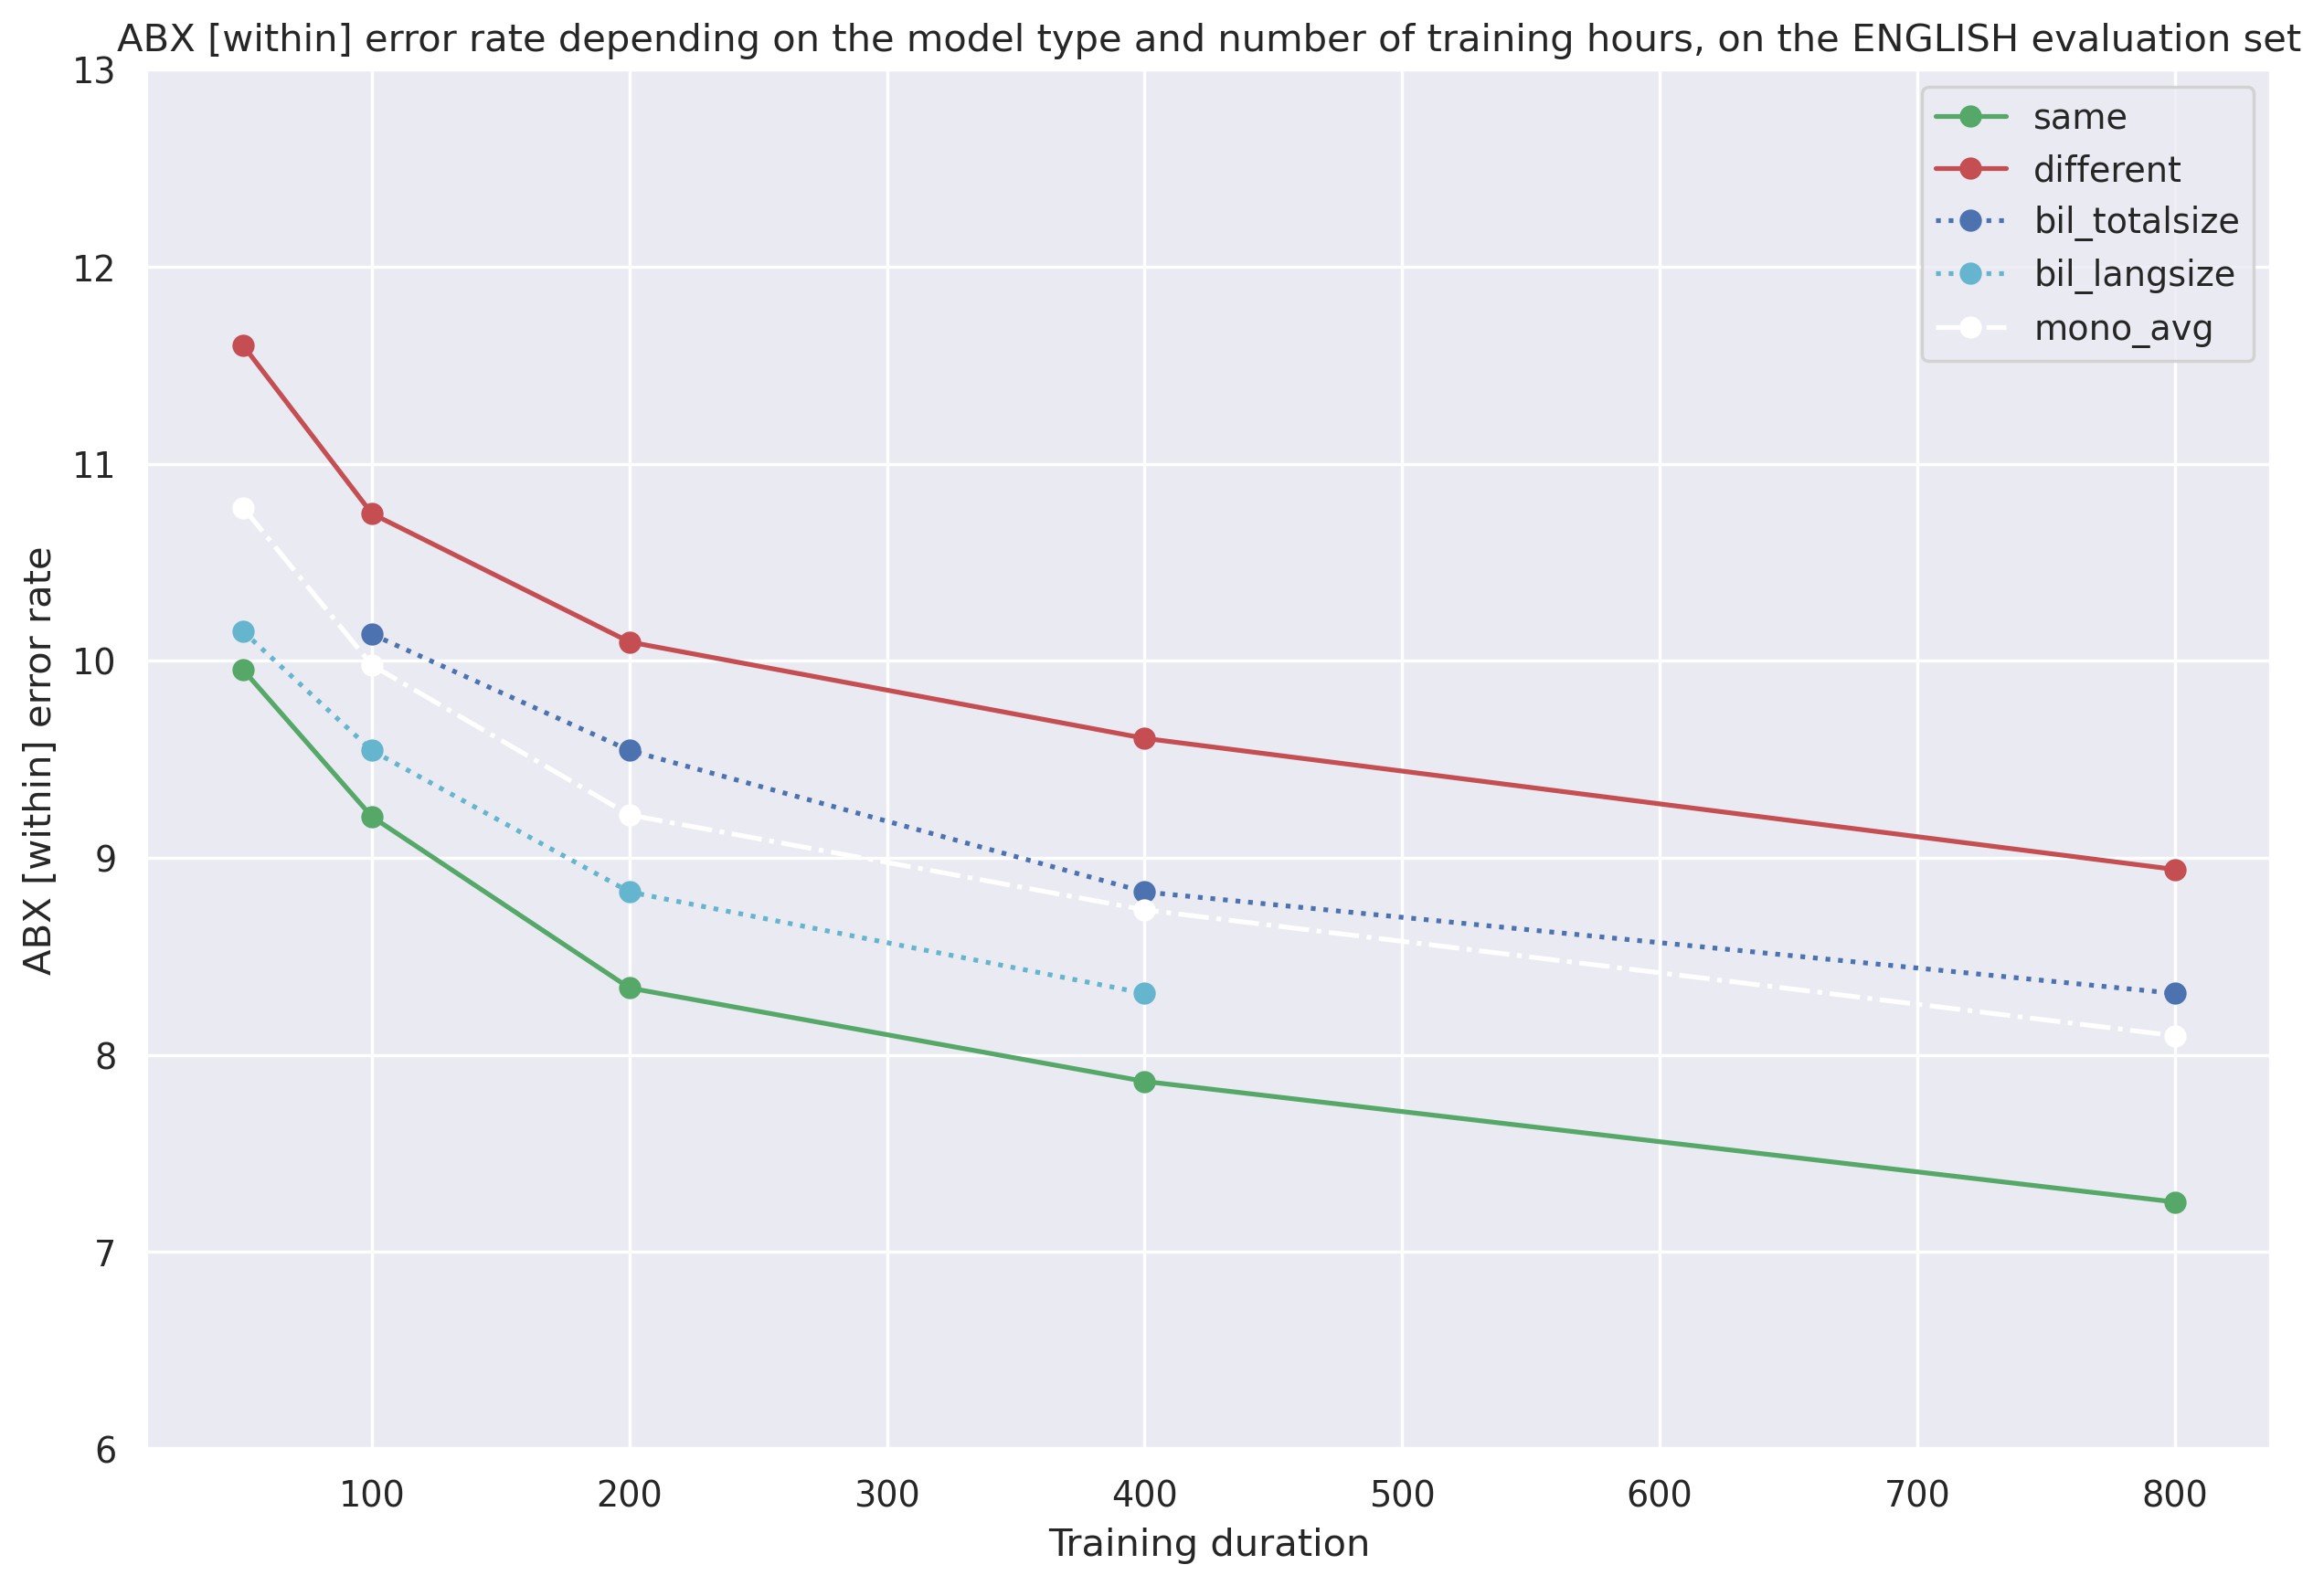

In [21]:
l="english"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict)
plt.title("ABX [within] error rate depending on the model type and number of training hours, on the ENGLISH evaluation set")
plt.xlabel("Training duration")
plt.ylabel("ABX [within] error rate")
plt.ylim([6,13])

### D4a. Developmental [within] ABX on the English test set - loglog scale

(6, 13)

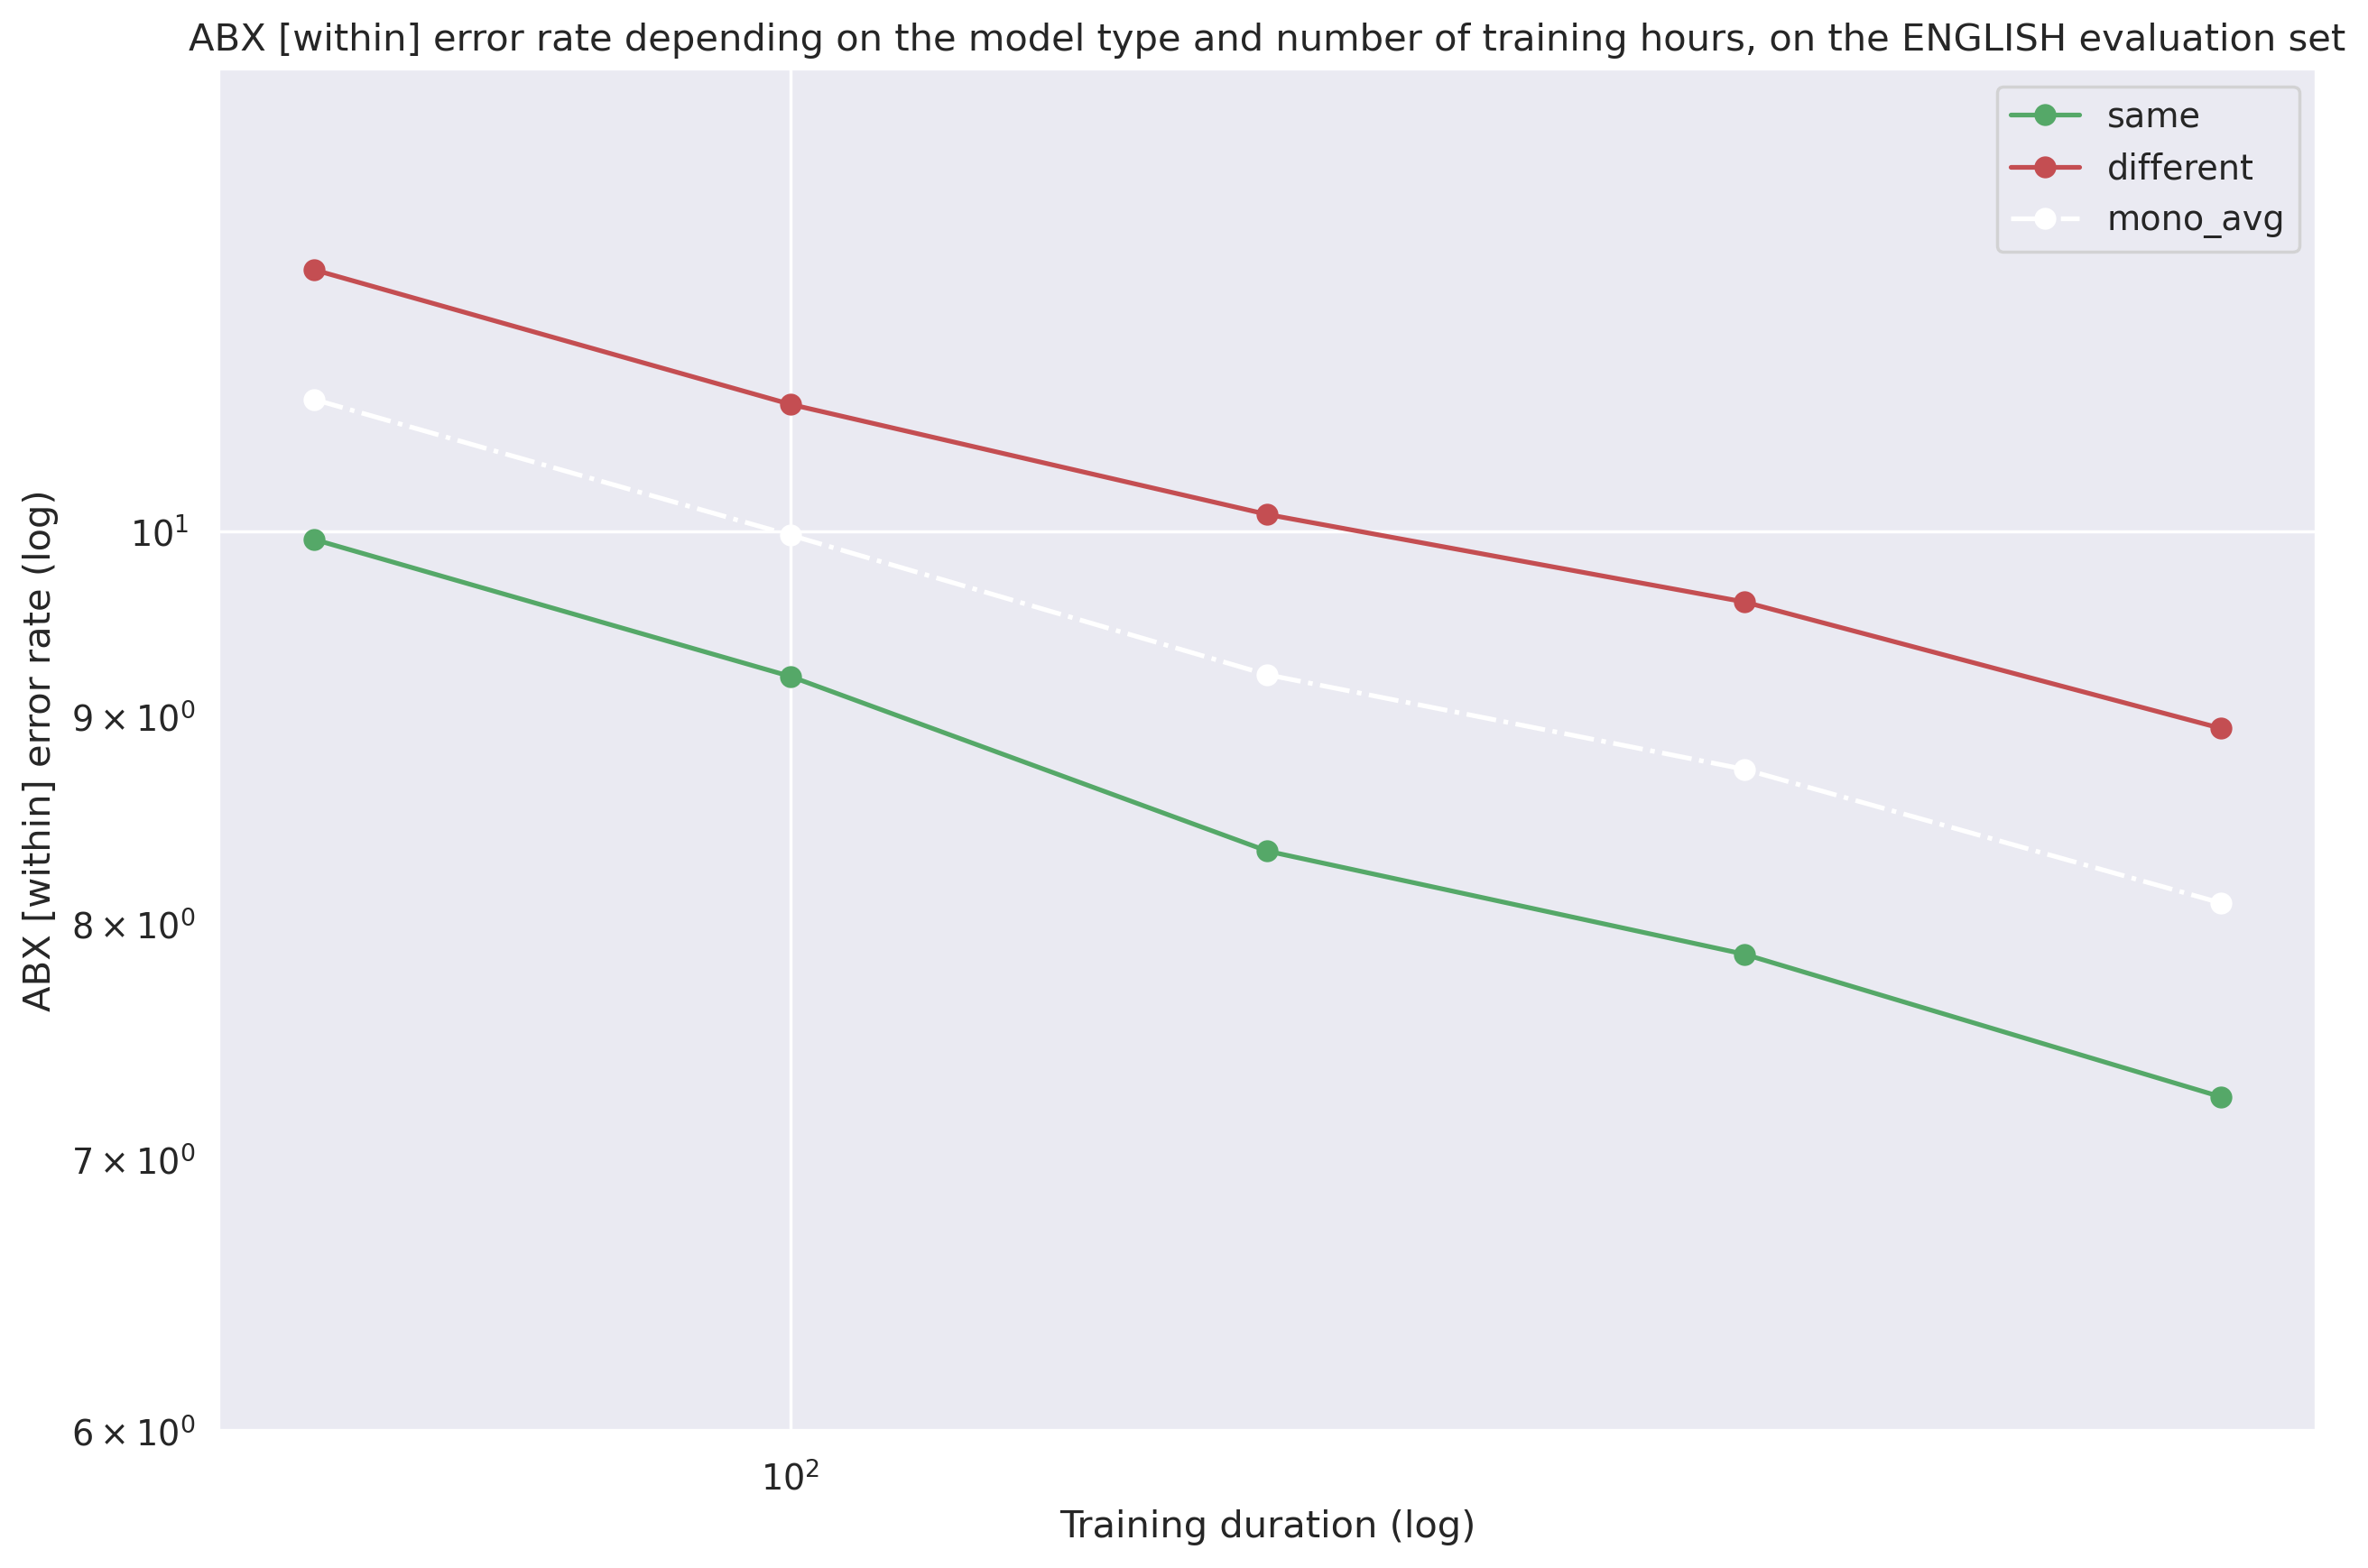

In [22]:
l="english"
df_tmp = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
#df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
df_tmp = df_tmp[['same', 'different',  'mono_avg']].plot(style = style_dict, loglog=True)

plt.title("ABX [within] error rate depending on the model type and number of training hours, on the ENGLISH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")
plt.ylim([6,13])

### D5. Developmental [across] ABX  on the French test set (original and QuickFix) - LogLog

Text(0, 0.5, 'ABX [within] error rate (log)')

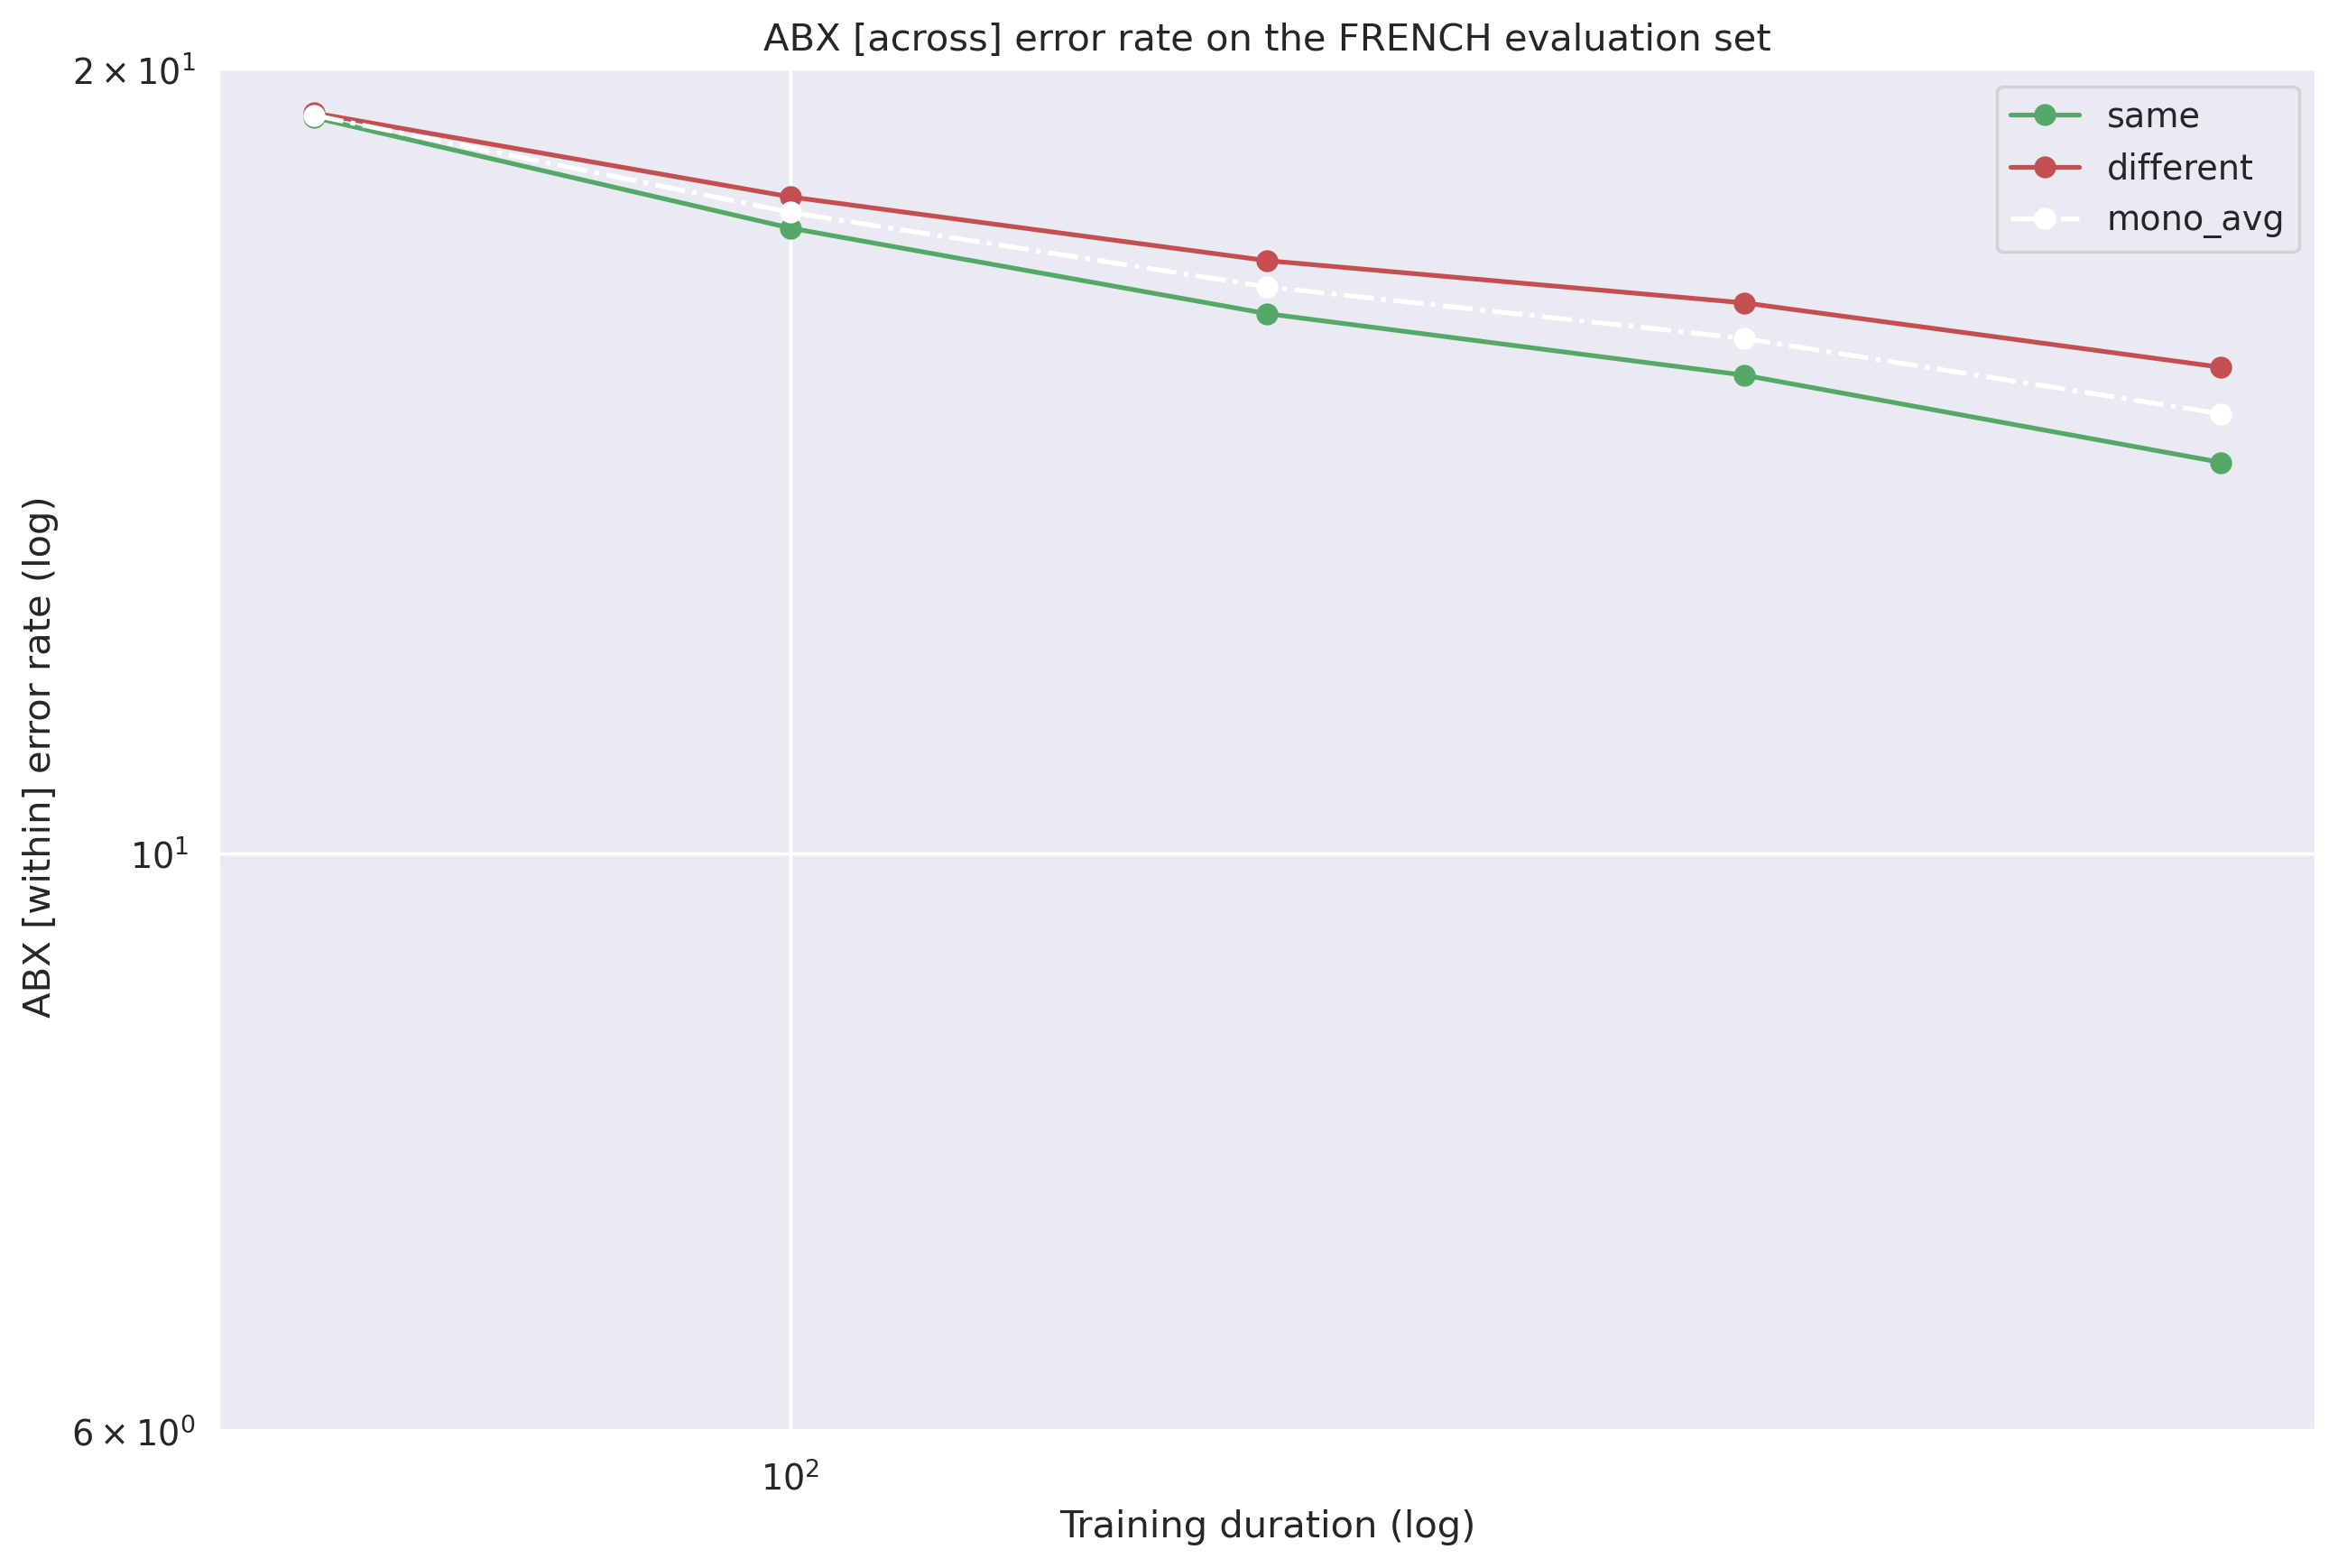

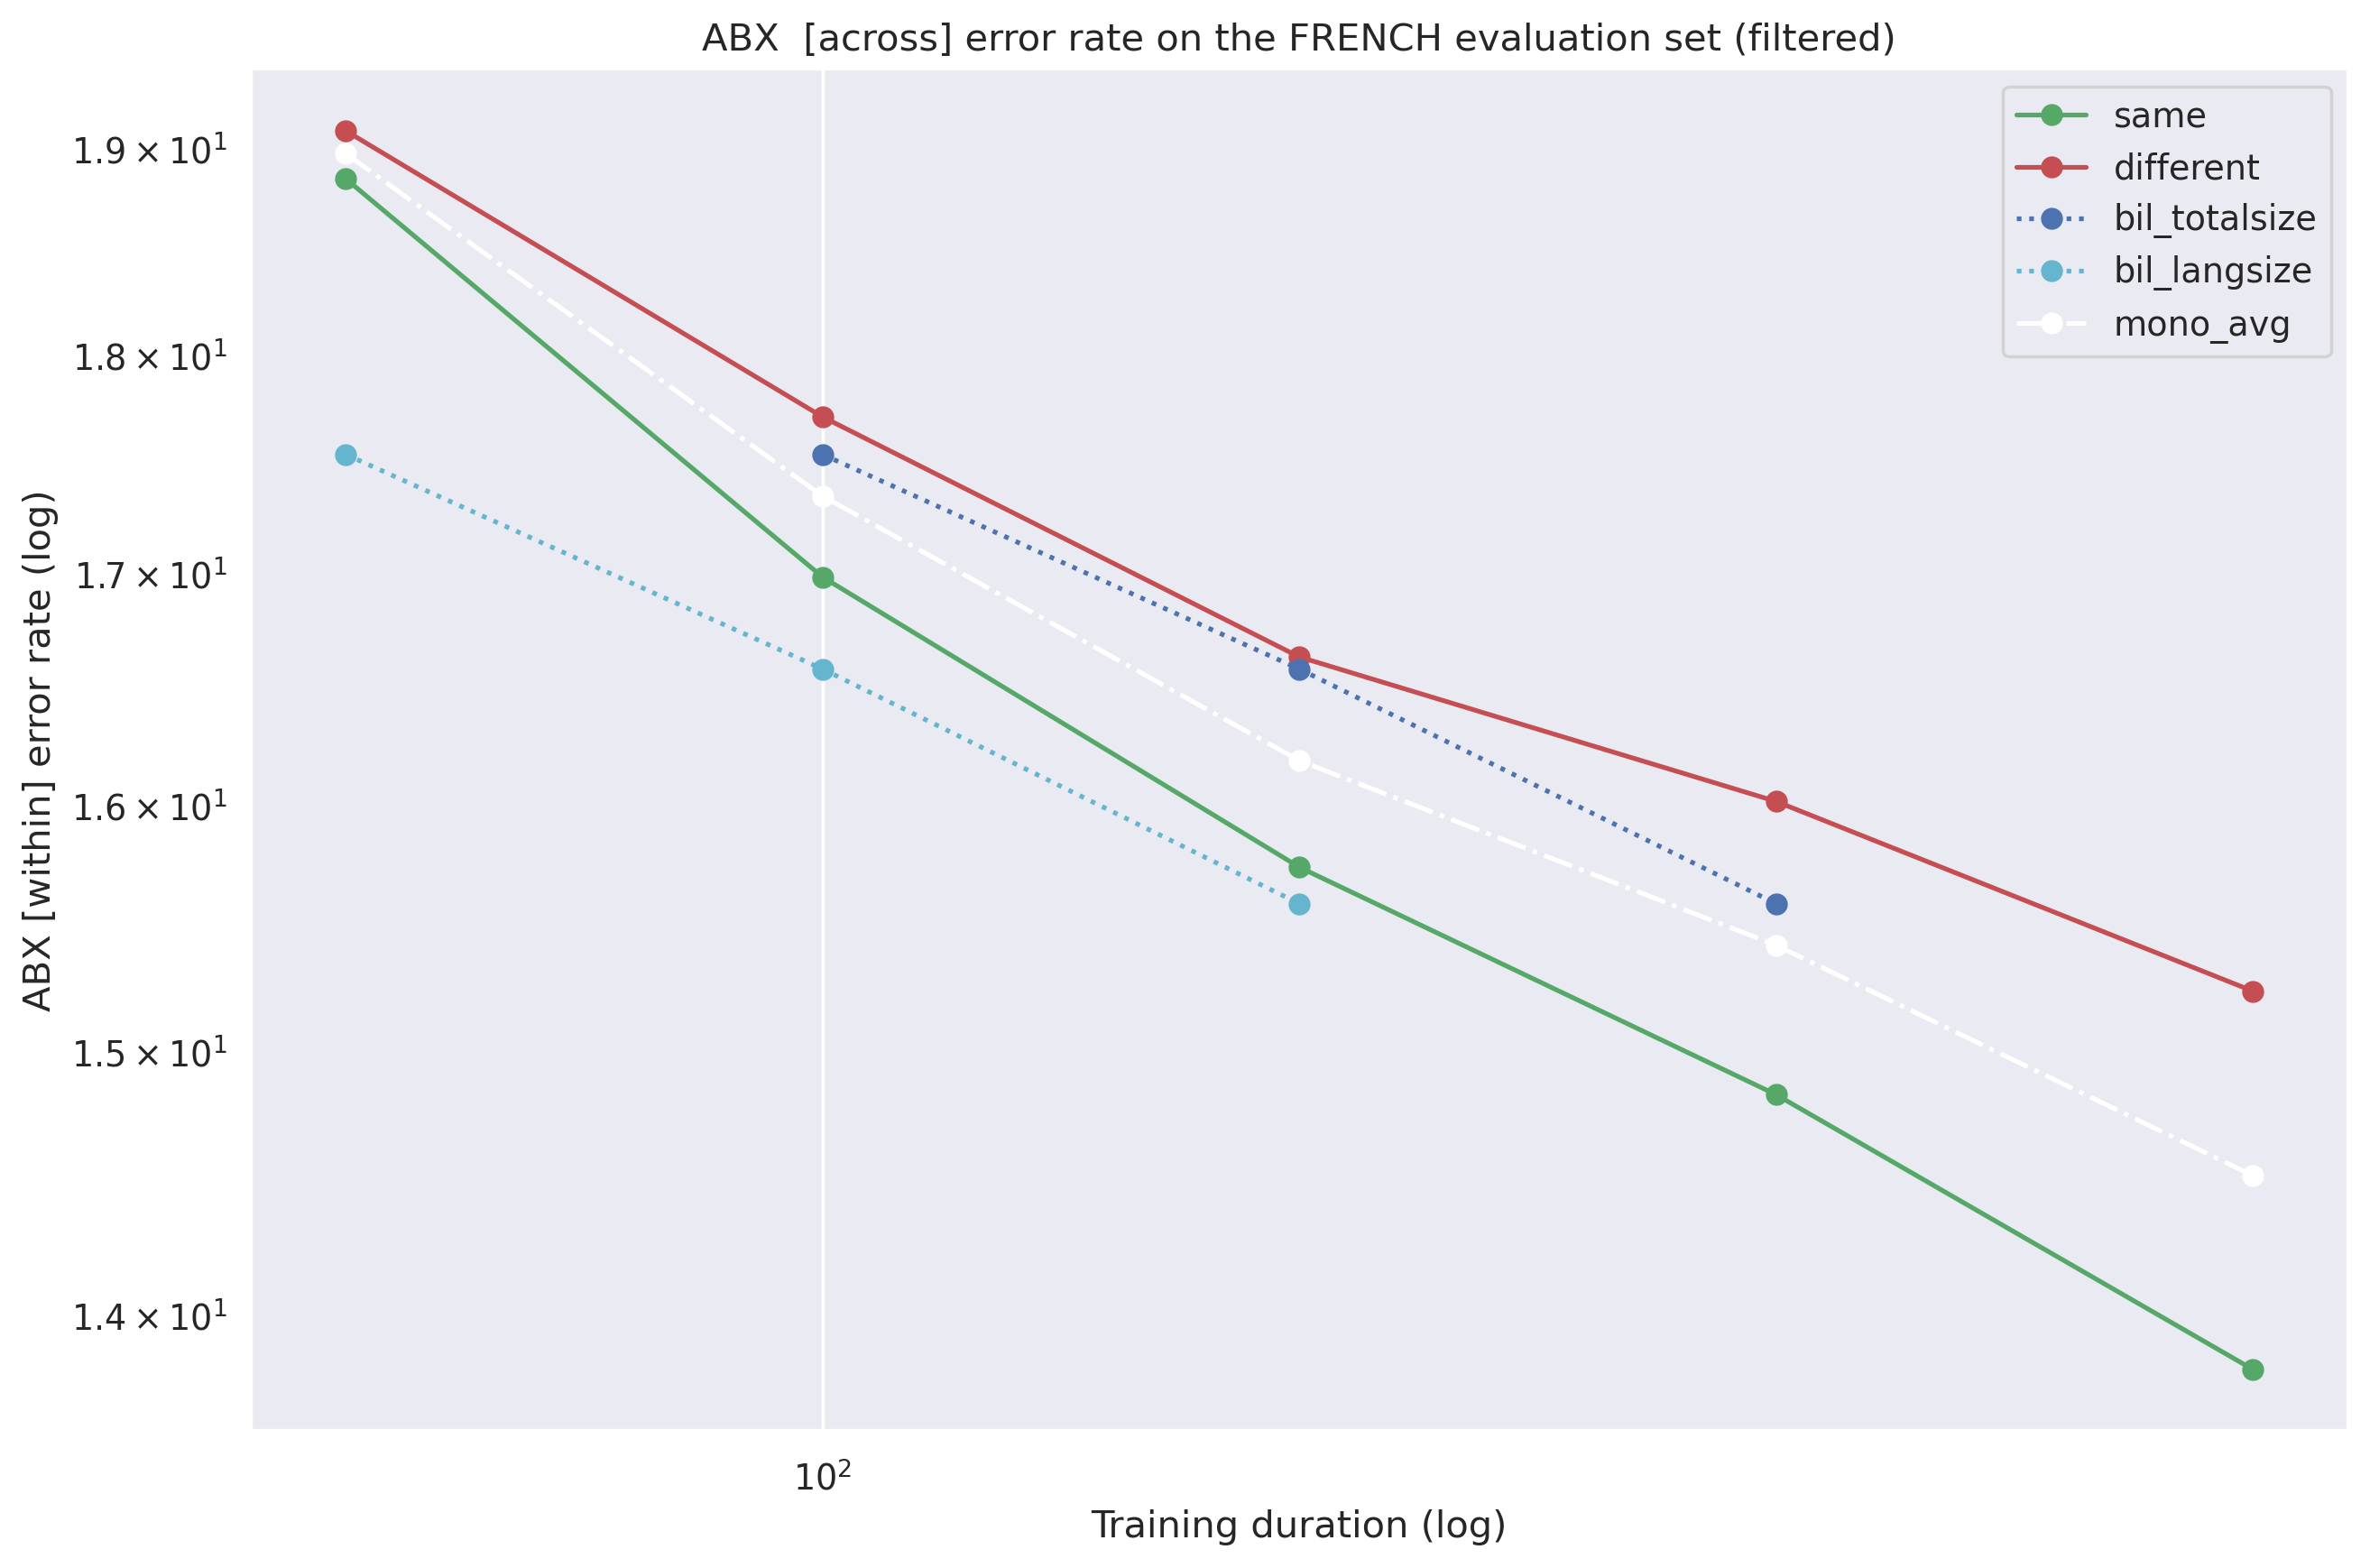

In [11]:
l="french"
df_tmp = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'mono_avg']].plot(style = style_dict, loglog=True)
#df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
plt.title("ABX [across] error rate on the FRENCH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log) ")
plt.ylim([6,20])

df_tmp = df_ef_across[df_ef_across["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)
plt.title("ABX  [across] error rate on the FRENCH evaluation set (filtered)")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")

### D6. Developmental [across] ABX  on the English test set (original and QuickFix) - LogLog

(6, 20)

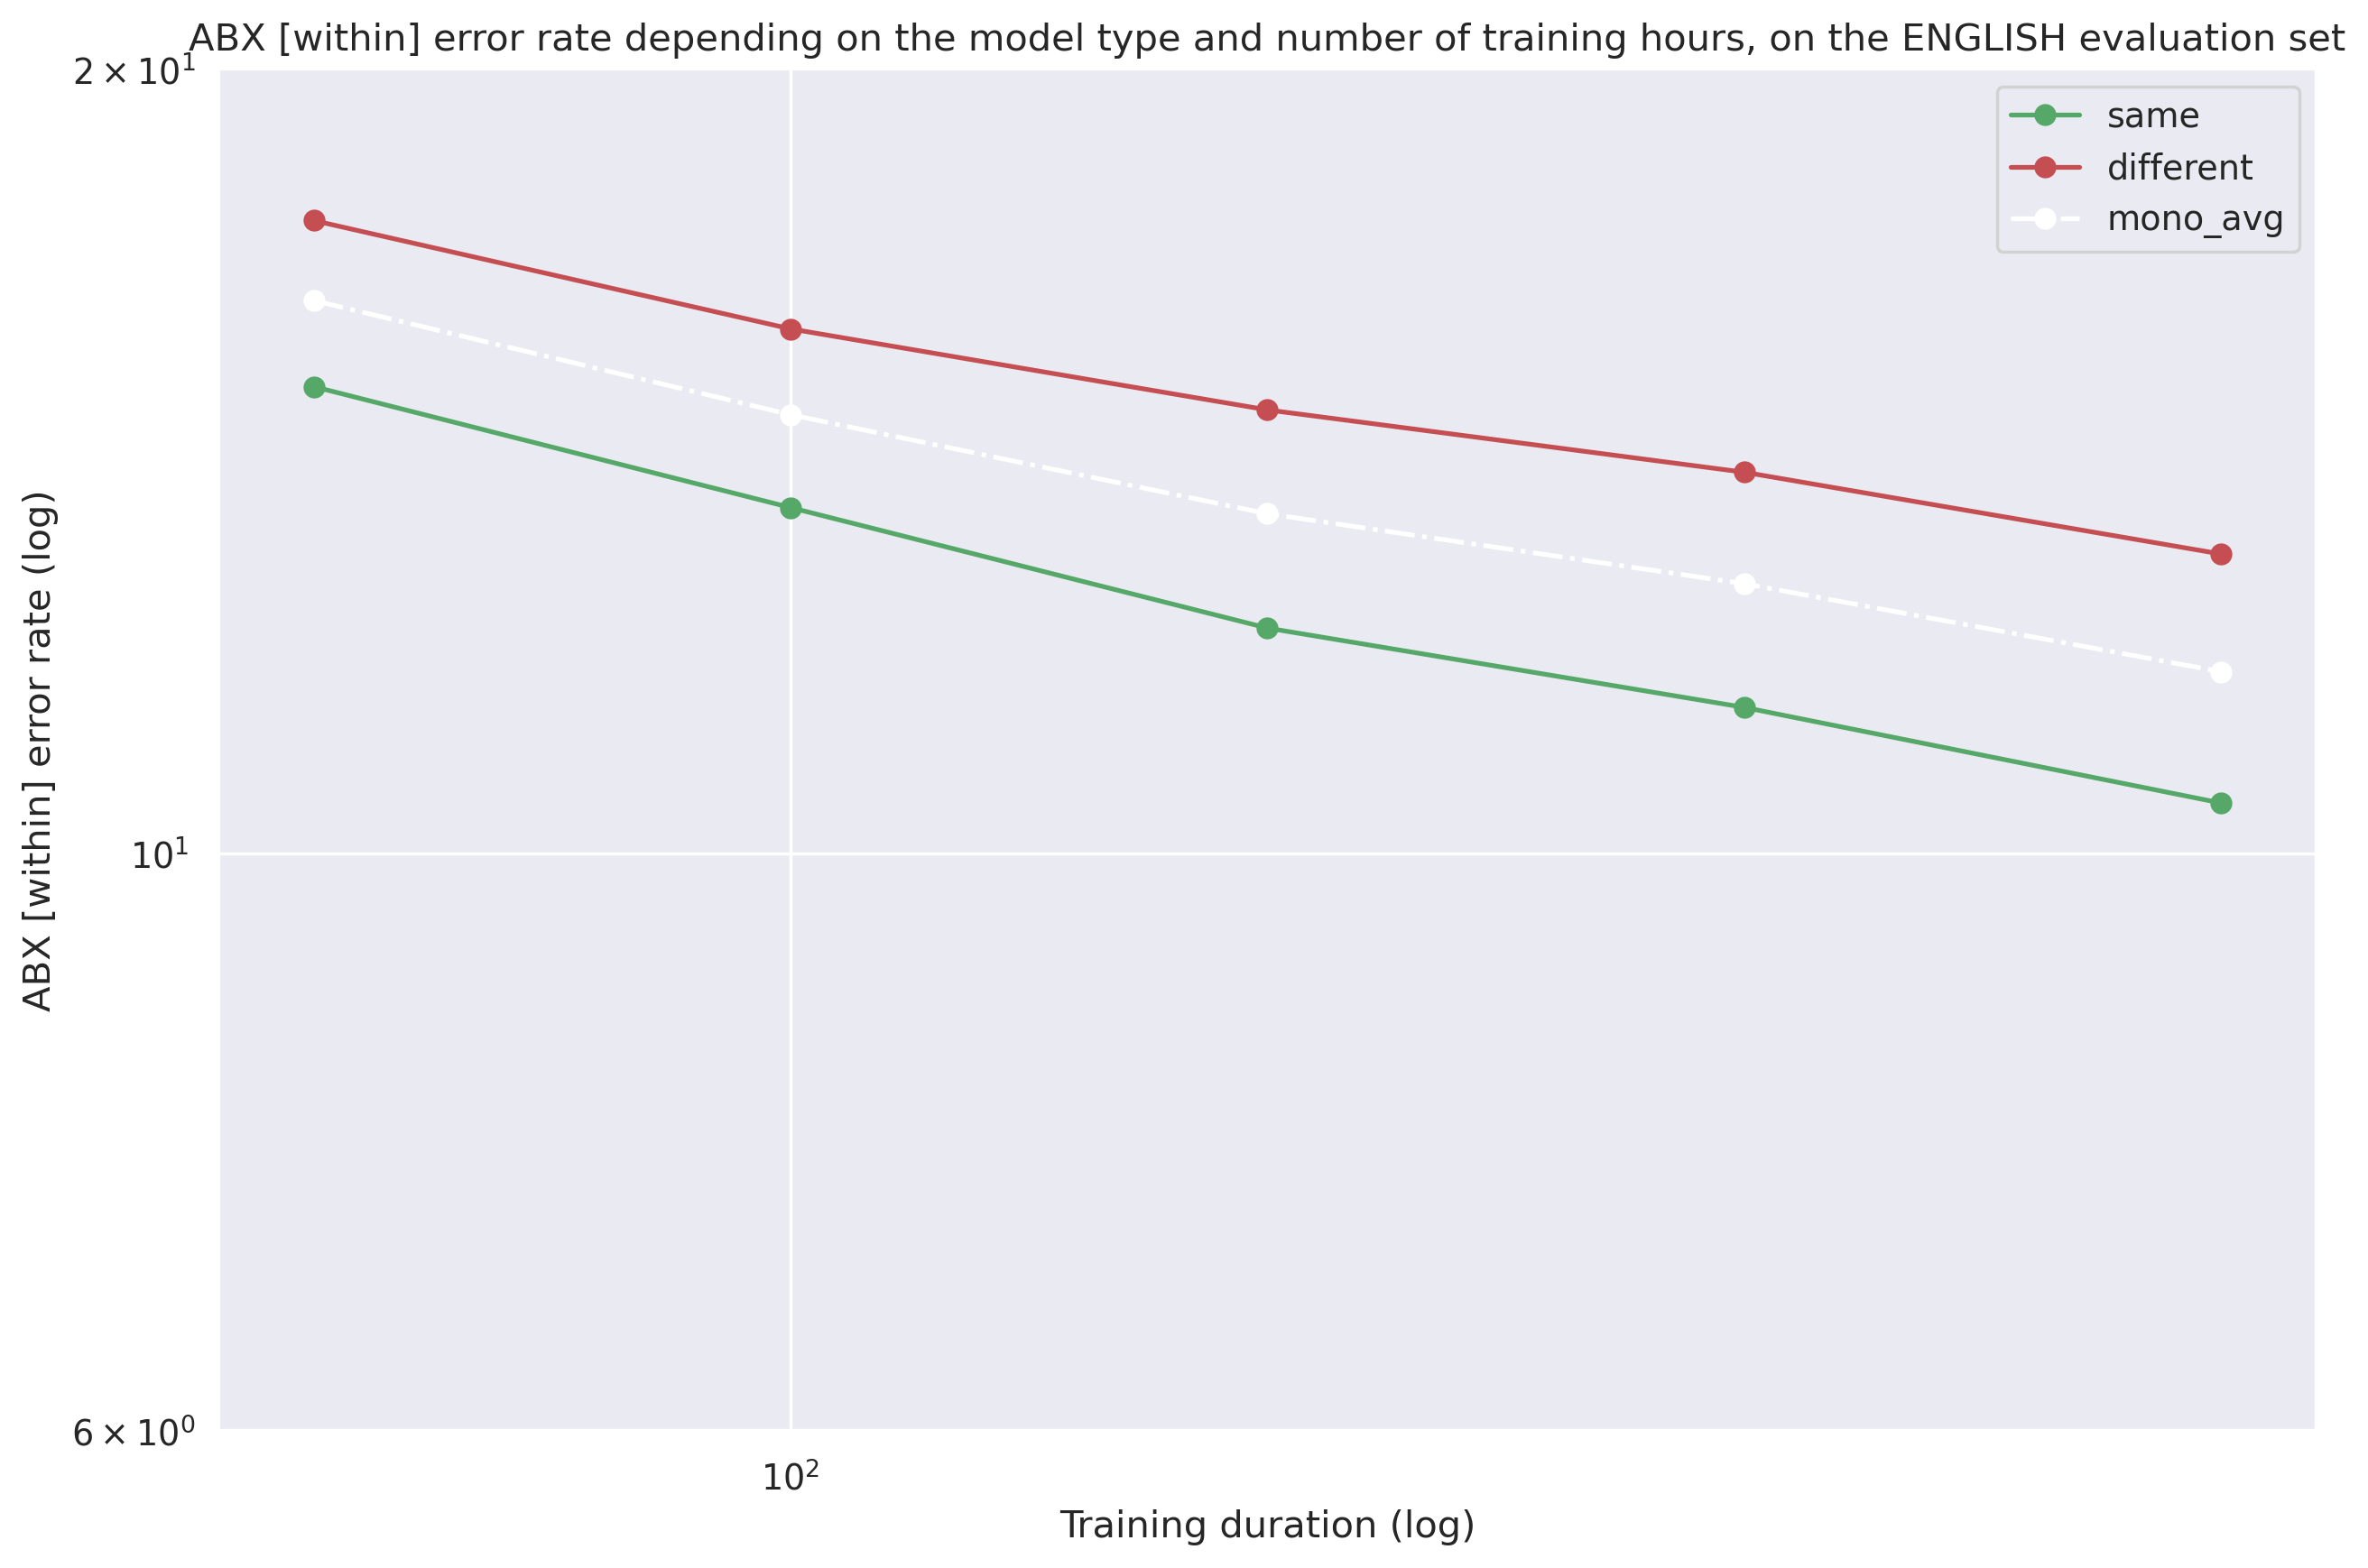

In [12]:
l="english"
df_tmp = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
df_tmp = df_tmp[['same', 'different', 'mono_avg']].plot(style = style_dict, loglog=True)
#df_tmp = df_tmp[['same', 'different', 'bil_totalsize', 'bil_langsize', 'mono_avg']].plot(style = style_dict, loglog=True)

plt.title("ABX [within] error rate depending on the model type and number of training hours, on the ENGLISH evaluation set")
plt.xlabel("Training duration (log)")
plt.ylabel("ABX [within] error rate (log)")
plt.ylim([6,20])

###  Calculating Relative Advantage per data doubling :
Eg There is a **x** improvement when we double the data

In [25]:
l="french"
df = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
df["doubling"] = [1, 2, 3, 4, 5]

df

en_model   fr_model  bil_totalsize_A  bil_totalsize_B       same  \
size                                                                      
50    12.150031  12.556733              NaN              NaN  12.556733   
100   11.603361  11.742047        11.972209        11.883759  11.742047   
200   11.065071  11.072798        11.495047        11.465693  11.072798   
400   10.772316  10.793688        11.036441        11.017865  10.793688   
800   10.146320  10.053133        10.621505        10.530125  10.053133   

      different  bil_langsize  bil_totalsize   mono_avg  doubling  
size                                                               
50    12.150031     11.928686            NaN  12.353382         1  
100   11.603361     11.480370      11.922402  11.672704         2  
200   11.065071     11.027153      11.480370  11.068935         3  
400   10.772316     10.575815      11.027153  10.783002         4  
800   10.146320           NaN      10.575815  10.099727         5

In [26]:
l="french"
df = df_ef_within[df_ef_within["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.8569937825283045
different -4.412478262172598
bil_langsize -4.3357281545696384
bil_totalsize -4.3357281545696384


In [27]:
l="french"
df = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -5.392328420869466
different -4.39883186553968
bil_langsize -3.9330099581528017
bil_totalsize -3.916099862500156


In [28]:
l="english"
df = df_within[df_within["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -7.597177968449518
different -6.296222320468983
bil_langsize -6.43445216880439
bil_totalsize -6.389999314876834


In [13]:
l="french"
df = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -7.326585096546252
different -5.4564423983013475
bil_langsize -5.376594446844305
bil_totalsize -5.335136182574767


In [15]:
l="english"
df = df_across[df_across["eval_lang"]==l].groupby(by="size").mean()
for s in ["same", "different", "bil_langsize", "bil_totalsize"] : 
    print(s, np.mean(np.diff(df[s]) / df[s][:-1] * 100))

same -8.779084578092702
different -7.094252440437027
bil_langsize -7.5289801996236
bil_totalsize -7.480068544453785
